#**PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS**
##**PÓS-GRADUAÇÃO LATO SENSU EM CIÊNCIA DE DADOS E BIG DATA**
###***TCC - TRABALHO DE CONCLUSÃO DE CURSO:***
###***APLICAÇÃO DE MODELOS ESTATÍSTICOS E DE APRENDIZADO DE MÁQUINA PARA A ESTIMATIVA DO PREÇO DA GASOLINA EM FUNÇÃO DE VARIÁVEIS ECONÔMICAS***
# Discente: Henrique Viegas Cunha
<hr>

### O presente *notebook* visa à exploração dos dados de diversas variáveis econômicas, avaliando sua evolução temporal e a existência de relação entre as mesmas
### O dados foram obtidos e tratados inicialmente por meio do notebook *extracao_e_tratamento_inicial.ipynb*
<hr> 

#***PROJETO FUEL_PRICE: análise exploratória***:
### **Capítulo 4**
<hr>

Como o nosso objetivo é a previsão do preço da gasolina, priorizamos a busca por variáveis que acredita-se a priori que possam ter influência.

O conjunto de dados analisado é composto pelas seguintes variáveis (para saber sobre a importação e tratamento inicial dos dados, conferir o noteboook *extracao_e_tratamento_inicial.ipynb*):
- Série histórica de preços do litro da gasolina (Fuel_Price) nas capitais do país:
    - Como existem diversas revendas, com preços distintos, o preço aqui utilizado é o preço médio do litro da gasolina para aquela data específica.
- Série histórica da cotação do dólar (USD/BRL);
- Série histórica do preço de ações da Petrobrás (PETR4);
- Série histórica do preço do barril de petróleo (Brent);
- Série histórica do Índice de Preços ao Consumidor Amplo (IPCA);
- Série histórica do Consumo de Energia Elétrica no Brasil.

Período de coleta dos dados:
- Compreendido entre janeiro de 2011 e janeiro de 2022.

<hr>

### *Montando* o drive do *google* para a leitura de arquivos no Google Drive e a exportação do dataframe de trabalho
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# "MONTANDO" o drive do Google Drive
# Load the Drive helper and mount (carregando)
from google.colab import drive
# This will prompt for authorization (prompt de autorização)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importação das bibliotecas a serem usadas
<hr>

In [ ]:
# Bibliotecas
# Para manipulação de dados
import numpy as np
import pandas as pd
import math

# Para plotagem dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Para manipulação de datas
from datetime import datetime
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Para funções estatísticas 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

# Selecionando o tema para os gráficos
sns.set_theme(style='ticks')

In [ ]:
#Definindo parâmetros de apresentação dos dados:
pd.set_option('display.max_columns', 30) #None) 
pd.set_option('display.max_rows', None) #30) 
pd.set_option('display.max_colwidth', None) #30)
#Definindo parâmetros de apresentação dos dados:
#pd.reset_option('display.max_columns') #None) 
#pd.reset_option('display.max_rows') #None) 
#pd.reset_option('display.max_colwidth') #None)

# Dataset de trabalho *df_trab* 
### Obtido na fase de extração e tratamento inicial, *df_final* está armazenado em formato *csv* e será importado (e copiado para *df_trab*)
<hr WIDTH=30% ALIGN=LEFT NOSHADE>


In [ ]:
# Leitura do dataset de trabalho, df_final
arq_exportado = r'/content/drive/MyDrive/NOVO_TCC/DADOS/BACKUP_DF/df_final.csv'
#arq_exportado = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\BACKUP_DF\\df_final.csv'
df_trab = pd.read_csv(arq_exportado)

# Visualizando o dataset obtido
df_trab.head()

,Date,PETR4,USD/BRL,IPCA,MWh,Fuel_Price,Brent
0,2011-01-03,27.000000,1.6470,0.43,35873744,2.584085,94.84
1,2011-01-04,26.900000,1.6610,0.43,35873744,2.637004,93.53
2,2011-01-05,27.219999,1.6737,0.43,35873744,2.606665,95.50
3,2011-01-06,27.110001,1.6856,0.43,35873744,2.669766,94.52
4,2011-01-10,26.980000,1.6888,0.43,35873744,2.614946,95.70


In [ ]:
# Informações do dataframe de trabalho (df_trab):
df_trab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2176 non-null   object 
 1   PETR4       2176 non-null   float64
 2   USD/BRL     2176 non-null   float64
 3   IPCA        2176 non-null   float64
 4   MWh         2176 non-null   int64  
 5   Fuel_Price  2176 non-null   float64
 6   Brent       2176 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 119.1+ KB


In [ ]:
# Modificando coluna Date para tipo Datetime
df_trab['Date'] = pd.to_datetime(df_trab['Date'])

# Modificando coluna MWh para tipo float
df_trab['MWh'] = df_trab['MWh'].astype(float)

# Consultando o tipo de dado das colunas:
df_trab.dtypes

Date          datetime64[ns]
PETR4                float64
USD/BRL              float64
IPCA                 float64
MWh                  float64
Fuel_Price           float64
Brent                float64
dtype: object

In [ ]:
# Reindexando o dataset obtido
df_trab = df_trab.reindex(columns=['Date','Fuel_Price','USD/BRL','PETR4','Brent','IPCA','MWh'])
df_trab.head()

,Date,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
0,2011-01-03,2.584085,1.6470,27.000000,94.84,0.43,35873744.0
1,2011-01-04,2.637004,1.6610,26.900000,93.53,0.43,35873744.0
2,2011-01-05,2.606665,1.6737,27.219999,95.50,0.43,35873744.0
3,2011-01-06,2.669766,1.6856,27.110001,94.52,0.43,35873744.0
4,2011-01-10,2.614946,1.6888,26.980000,95.70,0.43,35873744.0


#***PROJETO FUEL_PRICE: análise exploratória (continuação)***
<hr>

# **Tendência de preços, cotações e índices**
# **Seção 4.1**
### O objetivo desta etapa consiste em visualizar a tendência histórica das variáveis aqui estudadas.
<hr>

Iremos trabalhar com meses, para isso, calculamos a média para cada mês. Para o caso do IPCA e para o consumo de energia (MWh) isso não é necessário, tendo em vista que os valores destas variáveis possuímos é único em cada mês


<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Construindo dataset para análise de séries temporais
df_st = df_trab.copy()

# Para fazer a média mensal, extrai-se somente o ano e o mês da coluna Data
df_st['Date'] = pd.to_datetime(df_st['Date'].apply(lambda x: str(x)[:7]))

# Agrupando os dados históricos por mês/ano e calculando a média mensal
df_st = df_st.groupby(by=['Date'], as_index=False).mean()
#df_st = df_st.groupby(by=['Date']).mean()

# Fixando a coluna Date como index da série temporal
df_st = df_st.set_index('Date')

# df_st.replace(to_replace=0.00,value=0.01, inplace=True)
# Visualizando o novo conjunto de dados 
#(com as médias mensais)
df_st.head()


,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
Date,,,,,,
2011-01-01,2.618760,1.672913,27.193750,96.923125,0.43,35873744.0
2011-02-01,2.629314,1.668020,27.480000,103.528000,-0.02,35444916.0
2011-03-01,2.694681,1.658018,28.324118,114.596471,0.27,36350690.0
2011-04-01,2.840471,1.584553,26.798667,122.875333,0.60,36048318.0
2011-05-01,2.844023,1.612167,24.454278,114.950000,0.36,35565987.0


#### Visualização da série histórica para cada uma das variáveis
<hr>


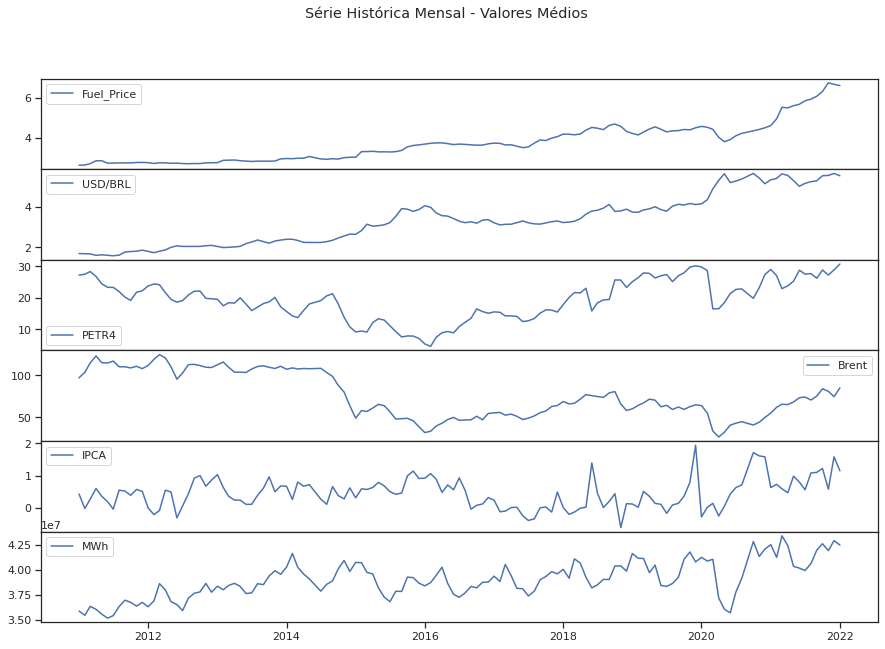

In [ ]:
# Plotando a área do gráfico
fig, ax = plt.subplots(6,1, figsize = (15,10), sharex=True)
plt.subplots_adjust(hspace = 0)

cols = df_st.columns.tolist()

for i in range(len(cols)):
    ax[i].plot(df_st[cols[i]], label=cols[i])
    ax[i].legend()
          
# Legendar todos os gráficos
plt.suptitle('Série Histórica Mensal - Valores Médios')

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'serie_historica_01.jpg', format='jpg')

plt.show()

### Observações iniciais quanto aos gráficos:

**1.** Até o ano de 2015 o aumento no preço da gasolina foi tímido, embora haja uma tendência alta, esta não é íngreme;

**2.** A partir de meados de 2015 o aumento de preços da gasolina adquire aceleração, com altas mais significativas. Pode-se verificar um movimento parecido com o preço da cotação do Dólar;

**3.** O valor das ações da Petrobras vinha em queda até o início de 2016, sendo que a partir de então há uma considerável tendência de alta, acompanhando o movimento do preço da gasolina;

**4.** O valor barril de petróleo tipo Brent estava estável até o fim de 2014, apresentando queda significativa daí até início de 2016. Ele se manteve oscilante por certo período, havendo uma tendência de alta a partir de 2020. Salvo pelo período após 2020, não há uma identidade direta entre a curva do valor Brent e a curva do preço da gasolina;

**5.** Em razão de seu comportamento seja bastante oscilante, é difícil fazer inferências quanto ao comportamento do IPCA. Entretanto, ao que parece, até meados de 2017 as variações do IPCA mostram um viés de baixa. O índice inflacionário, a partir de então, pende à direção de alta;

**6.** O consumo de energia, embora muito oscilante, exibe um padrão de alta, salvo para o primeiro trimestre de 2020. Suas variações ao longo do período amostral aparentam possuir um padrão sazonal;

**7.** Em todos os gráficos, há um descolamento da curva histórica no primeiro trimestre de 2020. Salvo a cotação do dólar, que apresentou alta neste período, os outros elementos econômicos apresentam queda em seus índices. É interessante notar que este período foi marcado pelo início da pandemia do Coronavírus.

### A seguir, aprofunda-se a investigação dos pontos observados para a variáveis econômicas, fazendo uso de algumas ferramentas estatísticas

###Inicia-se com a análise da variação percentual mensal para nossa principal variável o preço da gasolina
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

# **Subseção 4.1.1**
#### **Preços, índices e medições: variação percentual entre os meses**
<hr>

In [ ]:
# Colocando as colunas em lista para uso do for
cols = df_st.columns.tolist()

# Calculando a variação percentual mês a mês
# fazendo uso da função estatística pct_change do pandas

df_var_st = pd.DataFrame() # Dataframe com as varições percentuais das séries temporais

for col in cols:
    df_var_st[f'var_{col}'] = df_st[col].pct_change(periods=1)

# Reinicializando o index
df_var_st.reset_index(inplace=True)
    
# Visualização do resultado
df_var_st.head()

,Date,var_Fuel_Price,var_USD/BRL,var_PETR4,var_Brent,var_IPCA,var_MWh
0,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-02-01,0.004030,-0.002925,0.010526,0.068146,-1.046512,-0.011954
2,2011-03-01,0.024861,-0.005997,0.030718,0.106913,-14.500000,0.025554
3,2011-04-01,0.054103,-0.044309,-0.053857,0.072244,1.222222,-0.008318
4,2011-05-01,0.001251,0.017427,-0.087482,-0.064499,-0.400000,-0.013380


Este dataframe ajudará a comprovar ou reprovar as hipóteses formuladas inicialmente (comentários sobre os gráficos das séries temporais)

Para isso, faz-se o uso da partição dos períodos de análise e verificação de índices estatísticos
<hr>

### **Observações 1 e 2** 
### *(preço da gasolina e dólar)*
Análise das observações 1 e 2 sobre os gráficos do valor da gasolina e da variação do dólar
<hr>


In [ ]:
# Separando as variações do preço do combustível e do dólar até 01/06/2015
# e verificando as estatísticas 
until_jun_15 = df_var_st[(df_var_st.Date <= '2015-06-01')]
stats_untiljun_15 = until_jun_15.describe().T.reset_index()

# Separando os valores após junho de 2015
after_jun_15 = df_var_st[(df_var_st.Date > '2015-06-01')]
stats_afterjun_15 = after_jun_15.describe().T.reset_index()

In [ ]:
# Estatísticas para duas colunas de interesse (observações 1 e 2 dos gráficos):
stats_untiljun_15.query('index == ["var_Fuel_Price","var_USD/BRL"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,52.0,0.004595,0.020194,-0.043034,-0.003166,0.001461,0.005967,0.093990
1,var_USD/BRL,52.0,0.012535,0.034455,-0.044309,-0.007820,0.009849,0.035032,0.112591


In [ ]:
# Estatísticas para duas colunas de interesse (observações 1 e 2 dos gráficos):
stats_afterjun_15.query('index == ["var_Fuel_Price","var_USD/BRL"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,78.0,0.009443,0.029886,-0.09060,-0.007348,0.009817,0.025244,0.115923
1,var_USD/BRL,78.0,0.008250,0.040414,-0.08434,-0.020364,0.010946,0.028620,0.125073


### **Observações 1 e 2 (continuação)** 
### *(preço da gasolina e dólar)*
Para o preço da gasolina, é possível ver pelas estatísticas que, tanto média e medianas são o dobro após junho de 2015. O terceiro quartil também nos dá um bom indício do que foi observado.

Já a cotação do dólar não confirma a tendência de alta após junho de 2015. Analisando com mais cuidado o gráfico da cotação do dólar, vê-se que entre 2016 e 2018 houve uma queda inicial com viés de estabilidade. A tendência de alta somente ocorre de 2018 em diante. Assim, verificam-se as estatísticas antes e após 01/01/2018

<hr>

In [ ]:
# Separando as variações do preço do combustível e do dólar até 01/01/2018
# e verificando as estatísticas 
until_jan_18 = df_var_st[(df_var_st.Date < '2018-01-01')]
stats_untiljan_18 = until_jan_18.describe().T.reset_index()

# Separando os valores após janeiro de 2018
after_jan_18 = df_var_st[(df_var_st.Date >= '2018-01-01')]
stats_afterjan_18 = after_jan_18.describe().T.reset_index()

In [ ]:
# Estatísticas para duas colunas de interesse (observação 2 dos gráficos)
# antes de 01/01/2018:
stats_untiljan_18.query('index == ["var_Fuel_Price","var_USD/BRL"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,82.0,0.005533,0.019753,-0.043034,-0.004102,0.002025,0.009945,0.093990
1,var_USD/BRL,82.0,0.008942,0.036483,-0.069287,-0.018602,0.008097,0.027885,0.112591


In [ ]:
# Estatísticas para duas colunas de interesse (observação 2 dos gráficos)
# após 01/01/2018:
stats_afterjan_18.query('index == ["var_Fuel_Price","var_USD/BRL"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,48.0,0.01087,0.035079,-0.09060,-0.009633,0.014053,0.029902,0.115923
1,var_USD/BRL,48.0,0.01171,0.040956,-0.08434,-0.012541,0.014182,0.038176,0.125073


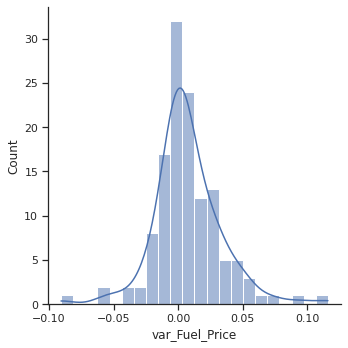

Coeficiente de assimetria "var_Fuel_Price": 0.51
Coeficiente de curtose "var_Fuel_Price": 3.64


In [ ]:
# Distribuição da variação mensal do preço da gasolina
# (todo o período de amostragem)
sns.displot(df_var_st ["var_Fuel_Price"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do preço da gasolina
print(f'Coeficiente de assimetria "var_Fuel_Price": {df_var_st ["var_Fuel_Price"].skew():.2f}')
print(f'Coeficiente de curtose "var_Fuel_Price": {df_var_st ["var_Fuel_Price"].kurt():.2f}')

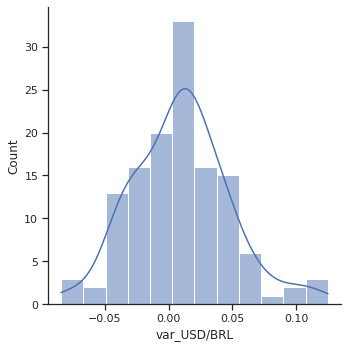

Coeficiente de assimetria "var_USD/BRL": 0.35
Coeficiente de curtose "var_USD/BRL": 0.56


In [ ]:
# Distribuição da variação mensal do preço do dólar
# (todo o período de amostragem)
sns.displot(df_var_st ["var_USD/BRL"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do preço do dólar
print(f'Coeficiente de assimetria "var_USD/BRL": {df_var_st ["var_USD/BRL"].skew():.2f}')
print(f'Coeficiente de curtose "var_USD/BRL": {df_var_st ["var_USD/BRL"].kurt():.2f}')

### **Observação 3** 
### *(ações Petrobras)*
Para analisarmos as variações no valor das ações da Petrobras, vamos dividir os dados nos períodos entre antes e após 31/12/2015.
<hr>

In [ ]:
# Separando as variações do preço das ações da Petrobras até 31/12/2015
# e verificando as estatísticas 
until_dec_15 = df_var_st[(df_var_st.Date <= '2015-12-31')]
stats_untildec_15 = until_dec_15.describe().T.reset_index()

# Separando os valores após 31/12/2015
after_dec_15 = df_var_st[(df_var_st.Date > '2015-12-31')]
stats_afterdec_15 = after_dec_15.describe().T.reset_index()

In [ ]:
# Estatísticas para as colunas de interesse (observação 3 dos gráficos)
# Até de 31/12/2015:
stats_untildec_15.query('index == ["var_Fuel_Price","var_PETR4"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,58.0,0.005894,0.020293,-0.043034,-0.002010,0.002025,0.008203,0.093990
2,var_PETR4,58.0,-0.017575,0.101893,-0.232760,-0.092886,-0.007482,0.052342,0.329793


In [ ]:
# Estatísticas para as colunas de interesse (observação 3 dos gráficos)
# Após 31/12/2015:
stats_afterdec_15.query('index == ["var_Fuel_Price","var_PETR4"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,72.0,0.008801,0.030618,-0.090600,-0.009244,0.009817,0.026028,0.115923
2,var_PETR4,72.0,0.029451,0.135926,-0.422974,-0.038398,0.028071,0.076828,0.615819


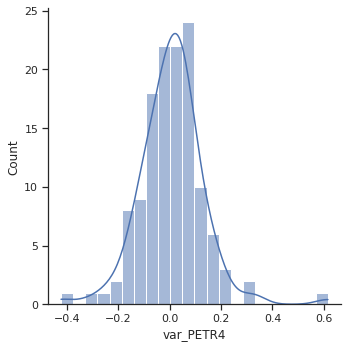

Coeficiente de assimetria "var_PETR4": 0.59
Coeficiente de curtose "var_PETR4": 4.91


In [ ]:
# Distribuição da variação mensal do preço das ações Petrobras
# (todo o período de amostragem)
sns.displot(df_var_st ["var_PETR4"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do preço das ações Petrobras
print(f'Coeficiente de assimetria "var_PETR4": {df_var_st ["var_PETR4"].skew():.2f}')
print(f'Coeficiente de curtose "var_PETR4": {df_var_st ["var_PETR4"].kurt():.2f}')

### **Observação 3 (continuação)** 
### *(ações Petrobras)*

Foi confirmado a observação 3, ou seja, tanto a média quanto a mediana das variações da cotação das ações da Petrobras se invertem, apresentando viés de queda anterior a 31/12/2015 e de alta após essa data

Os dados do preço do combustível mostram a aceleração da tendência de alta, comparando-se os dois períodos
<hr>

### **Observação 4** 
### *(preço barril Brent)*
Para a análise quanto ao comportamento da curva valores do petróleo tipo Brent no mercado internacional, é interessante dividir o período de estudo em três partes, sendo: antes de 01/10/2014; entre 01/10/2014 e 01/01/2016; e posterior a esta data

Abaixo, os dados estatíticos para os períodos em separado
<hr>

In [ ]:
# Separando as variações do preço do barril de Brent até 30/09/2014
# e verificando as estatísticas 
until_set_14 = df_var_st[(df_var_st.Date <= '2014-09-30')]
stats_untilset_14 = until_set_14.describe().T.reset_index()

# Separando os valores entre 01/10/2014 e 31/12/2015
years_14_15 = df_var_st[(df_var_st.Date > '2014-09-30')&(df_var_st.Date <= '2015-12-31')]
stats_years_14_15 = years_14_15.describe().T.reset_index()

# Separando os valores após 31/12/2015
after_dec_15 = df_var_st[(df_var_st.Date > '2015-12-31')]
stats_afterdec_15 = after_dec_15.describe().T.reset_index()

In [ ]:
# Estatísticas para as colunas de interesse (observação 4) até de 30/09/2014:
stats_untilset_14.query('index == ["var_Fuel_Price","var_Brent"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,43.0,0.002864,0.016870,-0.043034,-0.003239,0.001671,0.005649,0.054103
3,var_Brent,43.0,0.001533,0.047917,-0.133493,-0.021922,-0.000024,0.028805,0.106913


In [ ]:
# Estatísticas para as colunas de interesse (observação 4) de 01/10/2014 a 31/12/2015:
stats_years_14_15.query('index == ["var_Fuel_Price","var_Brent"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,15.0,0.014578,0.026717,-0.008893,0.000381,0.004956,0.019687,0.093990
3,var_Brent,15.0,-0.053804,0.112754,-0.230896,-0.132317,-0.062150,0.009423,0.183297


In [ ]:
# Estatísticas para as colunas de interesse (observação 4) após 31/12/2015:
stats_afterdec_15.query('index == ["var_Fuel_Price","var_Brent"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,72.0,0.008801,0.030618,-0.090600,-0.009244,0.009817,0.026028,0.115923
3,var_Brent,72.0,0.016120,0.099147,-0.385062,-0.037465,0.034203,0.074126,0.255812


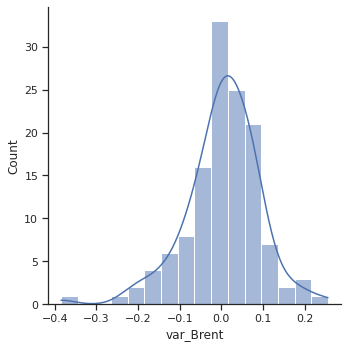

Coeficiente de assimetria "var_Brent": -0.74
Coeficiente de curtose "var_Brent": 2.69


In [ ]:
# Distribuição da variação mensal do preço do barril Brent
# (todo o período de amostragem)
sns.displot(df_var_st ["var_Brent"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do preço do barril Brent
print(f'Coeficiente de assimetria "var_Brent": {df_var_st ["var_Brent"].skew():.2f}')
print(f'Coeficiente de curtose "var_Brent": {df_var_st ["var_Brent"].kurt():.2f}')

### **Observação 4 (continuação)** 
### *(preço barril Brent)*
Para as variações mensais de preço do barril Brent, as medidas estatísticas (média, mediana e terceiro quartil) também confirmam as expectativas em relação aos períodos selecionados para estudo

Em relação ao descolamento da curva do barril Brent e o preço da gasolina, entende-se que esta discrepância pode ser em razão do aumento da cotação do dólar frente ao real, o que pode se sobrepor à variação negativa do Brent. Abaixo, faz-se a plotagem da curva para o dataframe fazendo a conversão do preço da gasolina em dólares
<hr>

In [ ]:
# Teste preço combustível em dólar
df_st_usd = df_st.copy()
df_st_usd['Fuel_Price_USD'] = df_st_usd['USD/BRL']**(-1)*df_st_usd['Fuel_Price']

In [ ]:
df_st_usd = df_st_usd.filter(items=['Fuel_Price','USD/BRL','Brent','Fuel_Price_USD'])
df_st_usd.head() #.filter(items=None, like=None, regex=None, axis=None)

,Fuel_Price,USD/BRL,Brent,Fuel_Price_USD
Date,,,,
2011-01-01,2.618760,1.672913,96.923125,1.565389
2011-02-01,2.629314,1.668020,103.528000,1.576309
2011-03-01,2.694681,1.658018,114.596471,1.625242
2011-04-01,2.840471,1.584553,122.875333,1.792600
2011-05-01,2.844023,1.612167,114.950000,1.764100


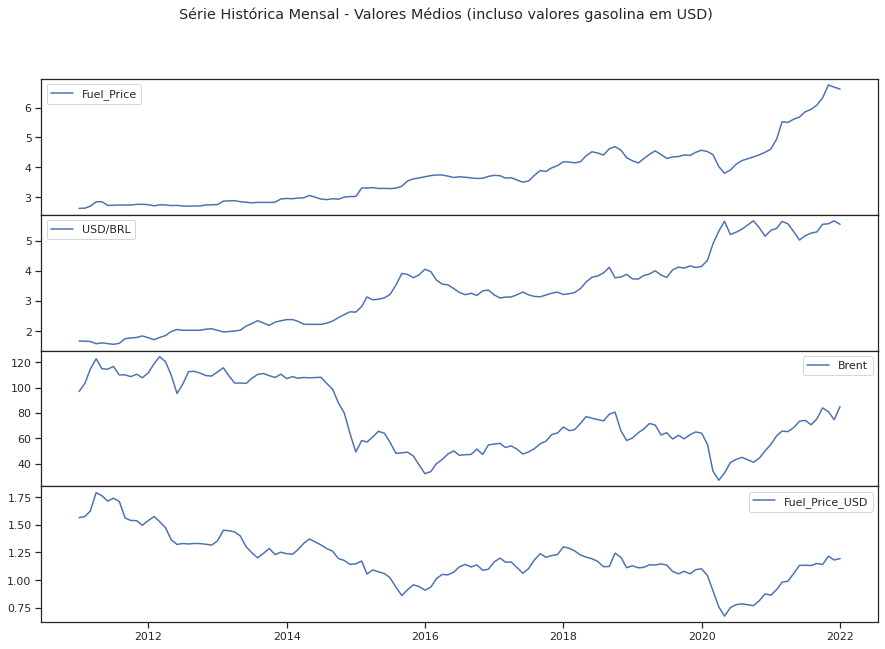

In [ ]:
# Plotando a área do gráfico
fig, ax = plt.subplots(4,1, figsize = (15,10), sharex=True)
plt.subplots_adjust(hspace = 0)

cols = df_st_usd.columns.tolist()

for i in range(len(cols)):
    ax[i].plot(df_st_usd[cols[i]], label=cols[i])
    ax[i].legend()
          
# Legendar todos os gráficos
plt.suptitle('Série Histórica Mensal - Valores Médios (incluso valores gasolina em USD)')

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'serie_historica_01_USD.jpg', format='jpg')

plt.show()

### **Observação 4 (comentários finais)** 
### *(barril de petróleo tipo Brent)*
Pelos gráficos acima tem-se o preço da gasolina convertido me dólares segue a curva de variação da cotação internacional do petróleo. É provável que a alta da cotação do dólar em relação ao real entre meados de 2014 e o início de 2020 acabe por sobrepor a influência do valor do Brent no preço final de revenda. Apesar dessa constatação, continua-se a utilizar na presente pesquisa o dataframe original sem os preços do combustível em dólar

Abaixo, verificam-se os dados para o IPCA
<hr>

### **Observação 5** 
### *(índice IPCA)*
O comportamento oscilante do IPCA dificulta a criação de ilações. Para a análise do comportamento do mesmo, divide-se a verificação em 2 períodos:
* Até 30/06/2017
* Posterior a 30/06/2017

A seguir, os dados estatíticos para os períodos em separado
<hr>

In [ ]:
# Separando as variações do preço do IPCA até 30/06/2017
# e verificando as estatísticas 
until_jun_17 = df_var_st[(df_var_st.Date <= '2017-06-30')]
stats_until_jun_17 = until_jun_17.describe().T.reset_index()

# Separando os valores após 30/06/2017
after_jun_17 = df_var_st[(df_var_st.Date > '2017-06-30')]
stats_after_jun_17 = after_jun_17.describe().T.reset_index()

In [ ]:
# Estatísticas para as colunas de interesse (observação 5 dos gráficos)
# Estatísticas IPCA até 30/06/2017
stats_until_jun_17.query('index == ["var_Fuel_Price","var_IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,76.0,0.003994,0.01884,-0.043034,-0.004400,0.001461,0.007856,0.093990
4,var_IPCA,76.0,-inf,NaN,-inf,-0.510417,-0.161439,0.261372,6.333333


In [ ]:
# Estatísticas IPCA após 30/06/2017
stats_after_jun_17.query('index == ["var_Fuel_Price","var_IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,54.0,0.012444,0.034044,-0.0906,-0.008742,0.014989,0.030850,0.115923
4,var_IPCA,54.0,inf,NaN,-21.0000,-0.979138,-0.197585,0.852679,inf


In [ ]:
# Achando as linha com variações mensais de IPCA
# mais infinito ou menos infinito
menos_infinito = -math.inf
mais_infinito = math.inf
linhas_menos_infinito = df_var_st.loc[df_var_st["var_IPCA"] == menos_infinito]
print('Dados com IPCA -inf:')
print(linhas_menos_infinito,'\n')
linhas_mais_infinito = df_var_st.loc[df_var_st["var_IPCA"] == mais_infinito]
print('Dados com IPCA +inf:')
print (linhas_mais_infinito,'\n')

Dados com IPCA -inf:
         Date  var_Fuel_Price  var_USD/BRL  var_PETR4  var_Brent  var_IPCA  \
13 2012-02-01       -0.013738    -0.036826   0.026719   0.065745      -inf   

     var_MWh  
13  0.016399   

Dados com IPCA +inf:
         Date  var_Fuel_Price  var_USD/BRL  var_PETR4  var_Brent  var_IPCA  \
80 2017-10-01       -0.007592     0.018691   0.068955   0.036971       inf   

     var_MWh  
80  0.008392   



In [ ]:
# Conferindo os valores médios mensais usados no cálculo das variações
# para as datas 01/01/2012 e 01/09/2017:
vals_df_st = df_st.loc[(df_st.index == "2012-01-01")|
                       (df_st.index == "2017-09-01")]
vals_df_st

,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
Date,,,,,,
2012-01-01,2.745074,1.783700,23.761764,111.607647,0.0,36305167.0
2017-09-01,3.888558,3.139073,15.153333,55.651333,0.0,39008926.0


In [ ]:
# Conferindo os valores médios mensais usados no cálculo das variações
# para as datas 01/02/2012 e 01/10/2017 determinaram se a variação foi 
# negativa (-inf) ou positiva (+inf)
vals_df_st = df_st.loc[(df_st.index == "2012-02-01")|
                       (df_st.index == "2017-10-01")]
vals_df_st

,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
Date,,,,,,
2012-02-01,2.707363,1.718013,24.396667,118.945333,-0.21,36900531.0
2017-10-01,3.859035,3.197747,16.198235,57.708824,0.03,39336272.0


In [ ]:
# Substituindo os valores infinitos no dataframe df_var_st, especificamente na
# coluna 'var_IPCA', e calculando as estatísticas novamente:
df_var_st['var_IPCA'].replace([np.inf, -np.inf], method="ffill", inplace=True)

# Separando as variações do preço do IPCA até 30/06/2017
# e verificando as estatísticas 
until_jun_17 = df_var_st[(df_var_st.Date <= '2017-06-30')]
stats_until_jun_17 = until_jun_17.describe().T.reset_index()

# Separando os valores após 30/06/2017
after_jun_17 = df_var_st[(df_var_st.Date > '2017-06-30')]
stats_after_jun_17 = after_jun_17.describe().T.reset_index()

In [ ]:
# Estatísticas para as colunas de interesse (observação 5 dos gráficos)
# Estatísticas IPCA até 30/06/2017
stats_until_jun_17.query('index == ["var_Fuel_Price","var_IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,76.0,0.003994,0.018840,-0.043034,-0.004400,0.001461,0.007856,0.093990
4,var_IPCA,76.0,-0.589989,3.156097,-14.750000,-0.510417,-0.161439,0.261372,6.333333


In [ ]:
# Estatísticas IPCA após 30/06/2017
stats_after_jun_17.query('index == ["var_Fuel_Price","var_IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,54.0,0.012444,0.034044,-0.0906,-0.008742,0.014989,0.030850,0.115923
4,var_IPCA,54.0,1.478330,10.799183,-21.0000,-0.994898,-0.208838,0.607639,68.500000


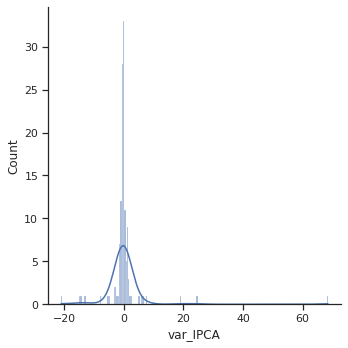

Coeficiente de assimetria "var_IPCA": 6.21
Coeficiente de curtose "var_IPCA": 57.85


In [ ]:
# Distribuição da variação mensal do IPCA
# (todo o período de amostragem)
sns.displot(df_var_st ["var_IPCA"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do IPCA
print(f'Coeficiente de assimetria "var_IPCA": {df_var_st ["var_IPCA"].skew():.2f}')
print(f'Coeficiente de curtose "var_IPCA": {df_var_st ["var_IPCA"].kurt():.2f}')

### **Observação 5 (continuação)** 
###*(ínidice IPCA)*
Embora simplificada, a análise das variações do IPCA confirmam as tendências apontadas

Em seguida, faz-se a mesma investigação para o consumo nacional de energia
<hr>

### **Observação 6** 
### *(medição do consumo de energia MWh)*
Para verificar a tendência de alta do consumo de energia ao longo dos anos serão analisadas medidas estatísticas e a curva de distribuição do consumo em MWh

Também serão plotados os dados de consumo anuais, por meio de bloxpolts, como será visto

As variações sazonais serão  verificadas posteriormente
<hr>

In [ ]:
# Variações do consumo de energia no Brasil em todo
# o período de análise (2011 a 2022)
general_stats = df_var_st.describe().T.reset_index()

# Verificando as estatísticas de MWh Variações do consumo de energia no Brasil 
# em todo# o período de análise (2011 a 2022)
general_stats.query('index == ["var_Fuel_Price","var_MWh"]')

,index,count,mean,std,min,25%,50%,75%,max
0,var_Fuel_Price,130.0,0.007504,0.026458,-0.090600,-0.005476,0.003339,0.019237,0.115923
5,var_MWh,130.0,0.001625,0.025510,-0.094442,-0.013336,-0.000282,0.017309,0.093949


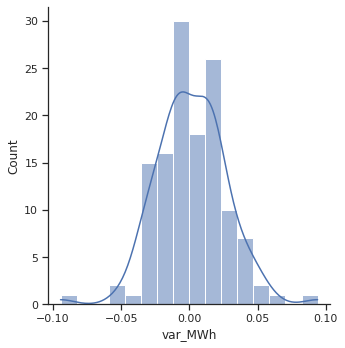

Coeficiente de assimetria "var_MWh": 0.04
Coeficiente de curtose "var_MWh": 1.64


In [ ]:
# Distribuição da variação mensal de MWh
# (todo o período de amostragem)
sns.displot(df_var_st ["var_MWh"], kde=True)
plt.show()
# Coeficientes de assimetria (skew) e de curtose (kurt) do MWh
print(f'Coeficiente de assimetria "var_MWh": {df_var_st ["var_MWh"].skew():.2f}')
print(f'Coeficiente de curtose "var_MWh": {df_var_st ["var_MWh"].kurt():.2f}')

### **Observação 6 (continução)** 
### *(medição do consumo de energia MWh)*
É interessante notar que os valores da média apresentam alta, mas em percentual bastante pequeno, sendo que a mediana é inclusive negativa. Aparentemente, o comportamento é oscilante, mesmo que na média haja mais altas do que baixas

Outra forma verificar a tendência dos gastos em energia seria verificar os valores de consumo anual. 

Para tal, recorre-se a gráficos boxplot, como mostrado a seguir
<hr>

In [ ]:
# Criando rótulo de ano e removendo a data completa
df_st_year = df_st.reset_index()
df_st_year['Date'] = pd.to_datetime(df_st_year['Date'])
df_st_year['year'] = df_st_year['Date'].apply(lambda x: x.year)
df_st_year.drop(labels='Date', inplace=True, axis=1)
df_st_year.head()

,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh,year
0,2.618760,1.672913,27.193750,96.923125,0.43,35873744.0,2011
1,2.629314,1.668020,27.480000,103.528000,-0.02,35444916.0,2011
2,2.694681,1.658018,28.324118,114.596471,0.27,36350690.0,2011
3,2.840471,1.584553,26.798667,122.875333,0.60,36048318.0,2011
4,2.844023,1.612167,24.454278,114.950000,0.36,35565987.0,2011


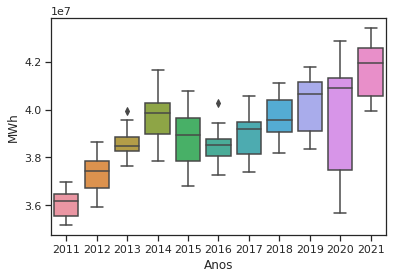

In [ ]:
# Fazendo a plotagem do box plot
sns.boxplot(y='MWh', x='year', data = df_st_year.loc[df_st_year['year']!=2022])

# legendas
plt.xlabel('Anos')
plt.show()

### Vemos ainda uma oscilação no consumo, considerado ano a ano. Mas pode-se perceber a tendência, na média, de acréscimos no consumo anual

### A seguir, verificam-se as tendências para as diversas variáveis econômicas por meio do uso de regressões lineares 
<hr>

# **Subseção 4.1.2**
#### **Preços, índices e medições: análise de tendência por regressão linear**
<hr>

### Para facilitar a construção, separam-se os períodos de análise das diversas variáveis. Os perídos e os tags dos mesmos estão descritos nas tabelas a seguir

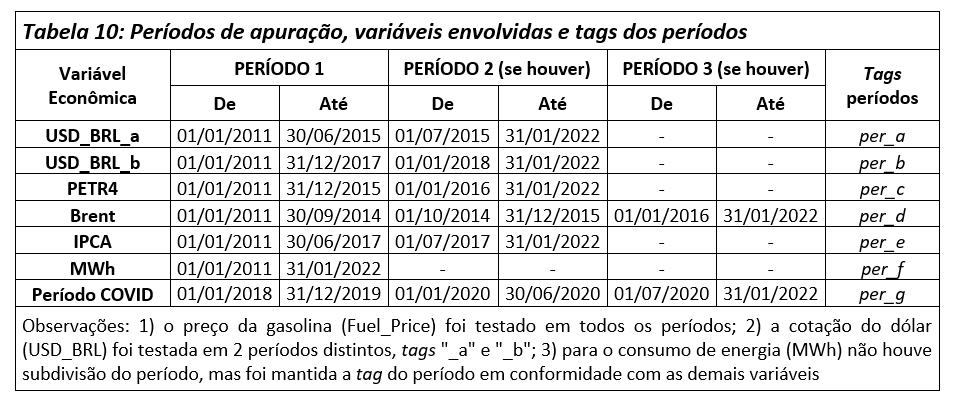

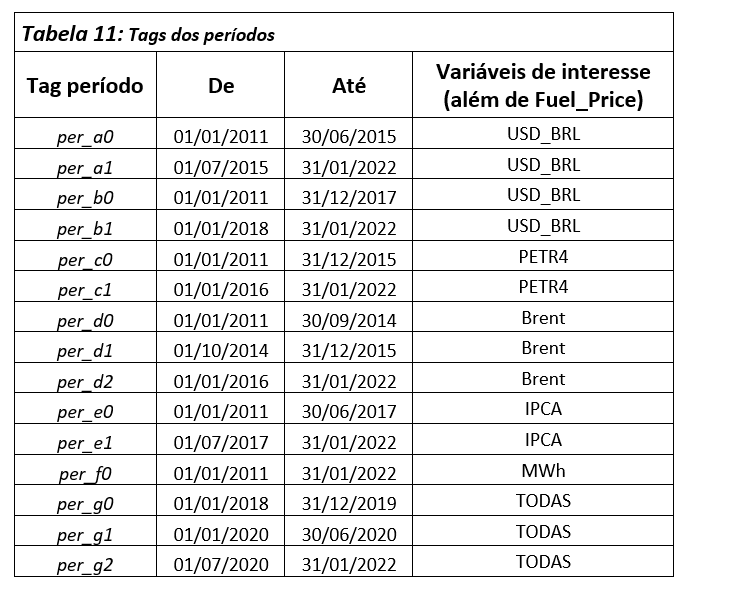

In [ ]:
# Gerando novamente o dataframe com o preço da gasolina
# em dólares americanos
df_st_usd = df_st.copy()
df_st_usd['Fuel_Price_USD'] = df_st_usd['USD/BRL']**(-1)*df_st_usd['Fuel_Price']

In [ ]:
# Separando os períodos de análise considerando o
# dataframe com os dados de médias mensais das variáveis econômicas
df_st_new = df_st_usd.copy()
df_st_new.insert(0, 'Date', df_st_new.index) # Colocando a coluna com a data
df_st_new.rename(columns={"USD/BRL":"USD_BRL"}, inplace=True) # Renomeando a coluna USD/BRL para salvar corretamente as figuras
df_st_new.loc[:,'MWh'] = df_st_new.loc[:,'MWh']*1e-6 # Ajustanto a escala do consumo de energia

per_a0 = df_st_new[(df_st_new.Date <= '2015-06-30')] # período para Fuel_Price e USD/BRL
per_a1 = df_st_new[(df_st_new.Date > '2015-06-30')] # período para Fuel_Price e USD/BRL

per_b0 = df_st_new[(df_st_new.Date <= '2017-12-31')] # período para Fuel_Price e USD/BRL
per_b1 = df_st_new[(df_st_new.Date > '2017-12-31')] # período para Fuel_Price e USD/BRL

per_c0 = df_st_new[(df_st_new.Date <= '2015-12-31')] # período para Fuel_Price e PETR4
per_c1 = df_st_new[(df_st_new.Date > '2015-12-31')] # período para Fuel_Price e PETR4

per_d0 = df_st_new[(df_st_new.Date <= '2014-09-30')] # período para Fuel_Price e Brent
per_d1 = df_st_new[(df_st_new.Date > '2014-09-30') & 
                       (df_st_new.Date <= '2015-12-31')]  # período para Fuel_Price e Brent
per_d2 = df_st_new[(df_st_new.Date > '2015-12-31')]  # período para Fuel_Price e Brent

per_e0 = df_st_new[(df_st_new.Date <= '2017-06-30')]  # período para Fuel_Price e IPCA
per_e1 = df_st_new[(df_st_new.Date > '2017-06-30')]  # período para Fuel_Price e IPCA

per_f0 = df_st_new[(df_st_new.Date <= '2022-01-31')] # período para Fuel_Price e MWh

# Análise período COVID x ANOS ANTERIORES
per_g0 = df_st_new[(df_st_new.Date > '2017-12-31') &
                       (df_st_new.Date <= '2019-12-31')] # período para Fuel_Price e demais (COVID)
per_g1 = df_st_new[(df_st_new.Date > '2019-12-31') & 
                       (df_st_new.Date <= '2020-06-30')]  # período para Fuel_Price e demais (COVID)
per_g2 = df_st_new[(df_st_new.Date > '2020-06-30')]  # período para Fuel_Price e demais (COVID)

###Após a separação entre os períodos mencionados, calcula-se o coeficiente beta de cada um, ou seja, feita a regressão linear, verificar-se a inclinação da reta ajustada em relação ao eixo X
<hr WIDTH=30% ALIGN=LEFT NOSHADE>


In [ ]:
# Função para gerar os parâmetros da regressão linear
def gera_lr (df_per, var_econ):
  
  # Criando os dados para a regressão linear
  X_per = np.arange(df_per.Date.shape[0])
  y_per = df_per[var_econ].values
  
  # Criando o objeto de regressão linear
  lr =  LinearRegression()
  # Ajustando eixos x e y (período 0)
  lr.fit(X_per.reshape(-1, 1), y_per)
  # Verificando o coeficiente beta e a linha
  beta_per = round(lr.coef_[0], 4)
  line_per = lr.coef_[0] * X_per + lr.intercept_

  return beta_per, line_per

In [ ]:
# Função para plotar os gráficos das regressões lineares
# Entrada: * dataframe de dados original com as médias mensais
# * períodos da regressão linear (um, dois ou três períodos)
# * label da variável econômica de interesse (além de "Fuel_Price" padrão em todos)

def plot_per (df_base, per_0, per_1, per_2, var_econ):

  # Criando a área de plotagem:
  #fig, ax = plt.subplots(2, 1, figsize = (15,10), sharex=True)
  fig, ax = plt.subplots(2, 1, figsize = (12,8), sharex=True)
  plt.subplots_adjust(hspace = 0)
  # Letra beta
  beta="\u03B2"
  # Criando as colunas da plotagem:
  cols = ["Fuel_Price", var_econ]

  for i in range(len(cols)):
    # Retas Calculadas
    # Calculando parâmetros para o per_0
    [beta0, linha0] = gera_lr (per_0,cols[i])

    if isinstance(per_1, pd.DataFrame):
      # Calculando parâmetros para o per_1
      [beta1, linha1] = gera_lr (per_1,cols[i])
      # Correlação entre betas
      ft_beta1 = abs(round(beta1/beta0, 3))
      
    # Se houver período 2
    if isinstance(per_2, pd.DataFrame):
      # Calculando parâmetros para o per_2
      [beta2, linha2] = gera_lr (per_2,cols[i])
      # Correlação entre betas
      ft_beta2 = abs(round(beta2/beta1, 3))

      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):len(linha0)+len(linha1), ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      ax[i].plot(df_base.iloc[len(linha0)+len(linha1):, ].index, linha2, 'c--', label=f'{beta}2 = {beta2}')
      ax[i].text(0.3, .93, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      ax[i].text(0.3, .87, f'| {beta}2 / {beta}1 | = {ft_beta2}', transform=ax[i].transAxes, fontsize=11)
      if cols[i] != 'MWh':
        ax[i].set_ylabel(cols[i])
      else:
        ax[i].set_ylabel(cols[i]+' x 10e6')
      ax[i].set_xlabel('Período')
      ax[i].legend()
  
    # Se houver período 1
    elif isinstance(per_1, pd.DataFrame):
      
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):, ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      #ax[i].text(0, 0, f'{beta}1/{beta}2 = {ft_beta1}', transform=ax[i].get_xaxis_transform())
      ax[i].text(0.3, .93, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      if cols[i] != 'MWh':
        ax[i].set_ylabel(cols[i])
      else:
        ax[i].set_ylabel(cols[i]+' x 10e6')
      ax[i].set_xlabel('Período')
      ax[i].legend(loc=0)
    
    # Se houver somente o período 0
    else:
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      if cols[i] != 'MWh':
        ax[i].set_ylabel(cols[i])
      else:
        ax[i].set_ylabel(cols[i]+' x 10e6')
      ax[i].set_xlabel('Período')
      ax[i].legend()

  plt.suptitle('Valores médios mensais e regressão linear para os períodos de análise',y=.93)
  
  # Salvando o gráfico/a figura gerada:
  agora = datetime.now(tz=None).strftime('%d_%m_%Y_%H_%M_%S') # Tag de diferenciação das figuras salvas
  time.sleep(1)
  # path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
  path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
  fig = plt.gcf()
#  #fig.savefig(path_fig+'fig_'+var_econ+'_'+agora, format='jpg')

  plt.show()

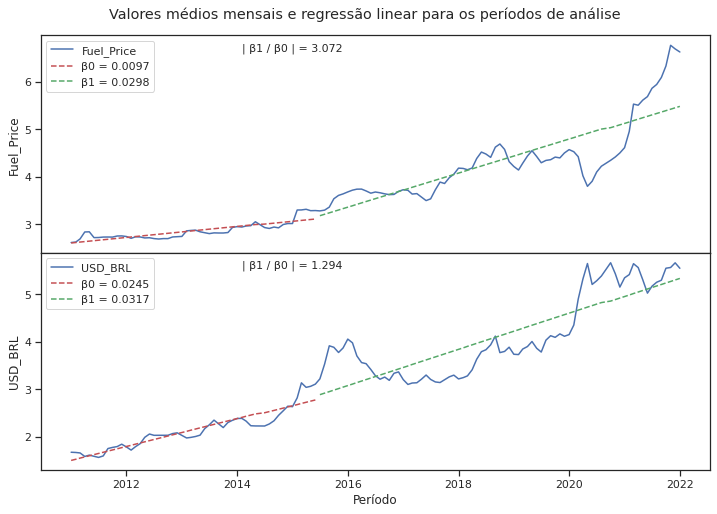

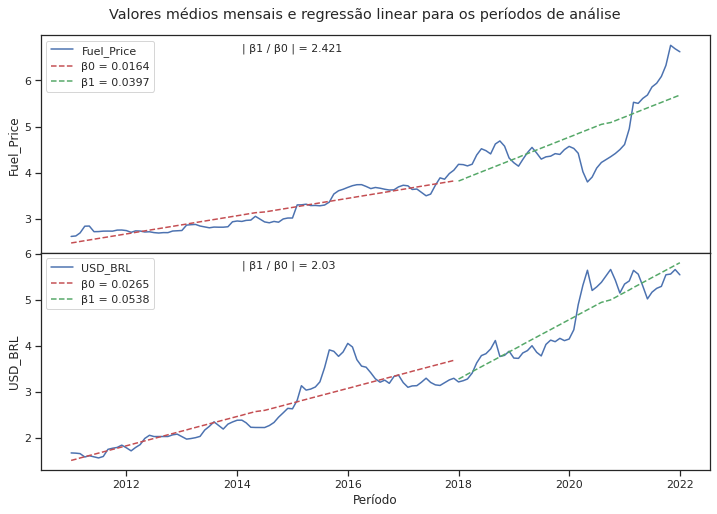

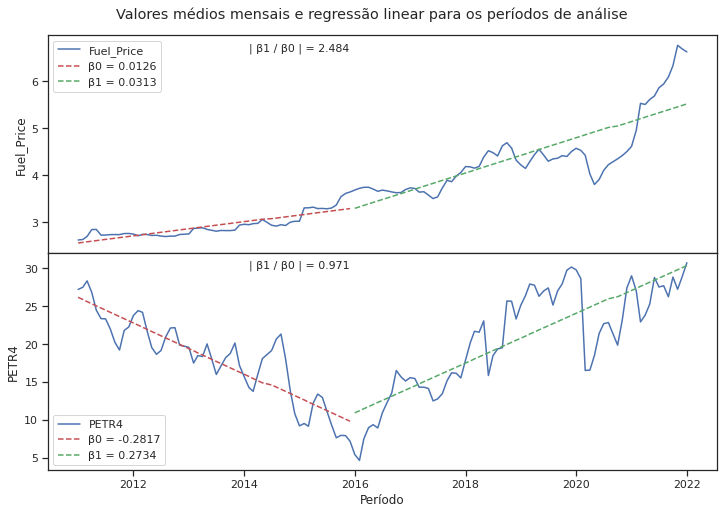

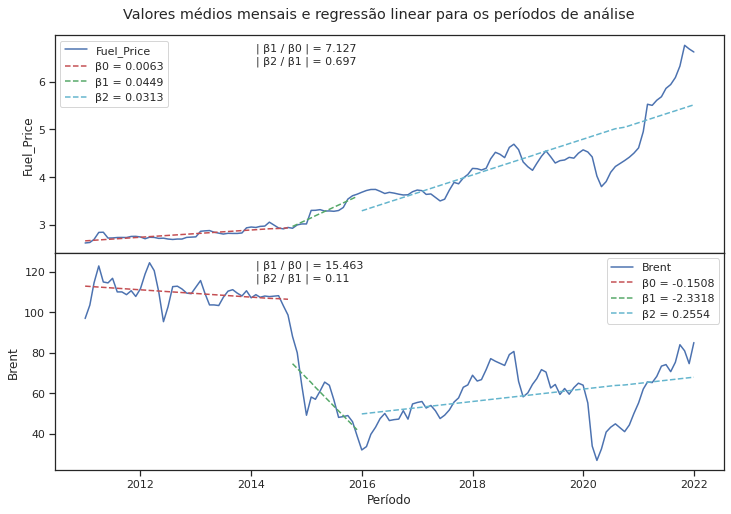

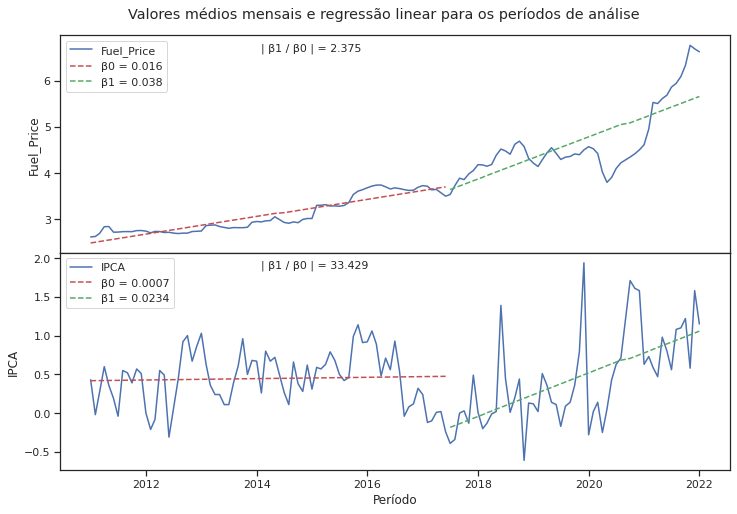

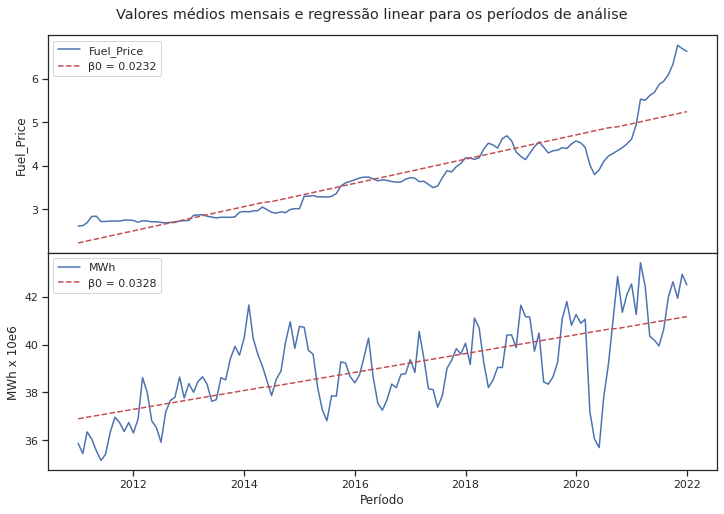

In [ ]:
# Definidas as funções de criação da regressão linear (nos períodos de interesse) e a função
# para a plotagem dos gráficos vamos gerar todas as figuras nos períodos de análise 
# período para Fuel_Price e USD/BRL - período "a"
plot_per (df_st_new, per_a0, per_a1, 0, "USD_BRL")
# período para Fuel_Price e USD/BRL - período "b"
plot_per (df_st_new, per_b0, per_b1, 0, "USD_BRL")
# período para Fuel_Price e PETR4 - período "c"
plot_per (df_st_new, per_c0, per_c1, 0, "PETR4")
# período para Fuel_Price e Brent - período "d"
plot_per (df_st_new, per_d0, per_d1, per_d2, "Brent")
# período para Fuel_Price e IPCA - período "e"
plot_per (df_st_new, per_e0, per_e1, 0, "IPCA")
# período para Fuel_Price e MWh - período "f"
plot_per (df_st_new, per_f0, 0, 0, "MWh")

### A seguir, a adaptação da função de plotagem de gráficos para comparação da regressão linear entre as seguintes variáveis:
### **Fuel_Price, USD_BRL, Brent e Fuel_Price_USD**
<hr>

In [ ]:
# Função para plotar os gráficos das regressões lineares em comparção com 
# o preço da gasolina em dólar
def plot_per_usd (df_base, per_0, per_1, per_2):

  # Criando a área de plotagem:
  fig, ax = plt.subplots(4, 1, figsize = (16,10.6667), sharex=True)
  plt.subplots_adjust(hspace = 0)
  # Letra beta
  beta="\u03B2"
  # Criando as colunas da plotagem:
  cols = ["Fuel_Price", "USD_BRL", "Brent", "Fuel_Price_USD"]

  for i in range(len(cols)):
    # Retas Calculadas
    # Calculando parâmetros para o per_0
    [beta0, linha0] = gera_lr (per_0,cols[i])

    if isinstance(per_1, pd.DataFrame):
      # Calculando parâmetros para o per_1
      [beta1, linha1] = gera_lr (per_1,cols[i])
      # Correlação entre betas
      ft_beta1 = abs(round(beta1/beta0, 3))
      
    # Se houver período 2
    if isinstance(per_2, pd.DataFrame):
      # Calculando parâmetros para o per_2
      [beta2, linha2] = gera_lr (per_2,cols[i])
      # Correlação entre betas
      ft_beta2 = abs(round(beta2/beta1, 3))

      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):len(linha0)+len(linha1), ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      ax[i].plot(df_base.iloc[len(linha0)+len(linha1):, ].index, linha2, 'c--', label=f'{beta}2 = {beta2}')
      ax[i].text(0.37, .90, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      ax[i].text(0.37, .80, f'| {beta}2 / {beta}1 | = {ft_beta2}', transform=ax[i].transAxes, fontsize=11)
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend()
            
    # Se houver período 1
    elif isinstance(per_1, pd.DataFrame):
      
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):, ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      #ax[i].text(0, 0, f'{beta}1/{beta}2 = {ft_beta1}', transform=ax[i].get_xaxis_transform())
      ax[i].text(0.37, .90, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend(loc=0)
    
    # Se houver somente o período 0
    else:
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend()

  plt.suptitle('Valores médios mensais e regressão linear para os períodos de análise', y=.925)
  
  # Salvando o gráfico/a figura gerada:
  # path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
  path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
  fig = plt.gcf()
#  #fig.savefig(path_fig+'fig_rl_Fuel_Price_USD', format='jpg')

  plt.show()

### Plotando a regressão linear para as variáveis: 
### **Fuel_Price, USD_BRL, Brent e Fuel_Price_USD**

<hr>

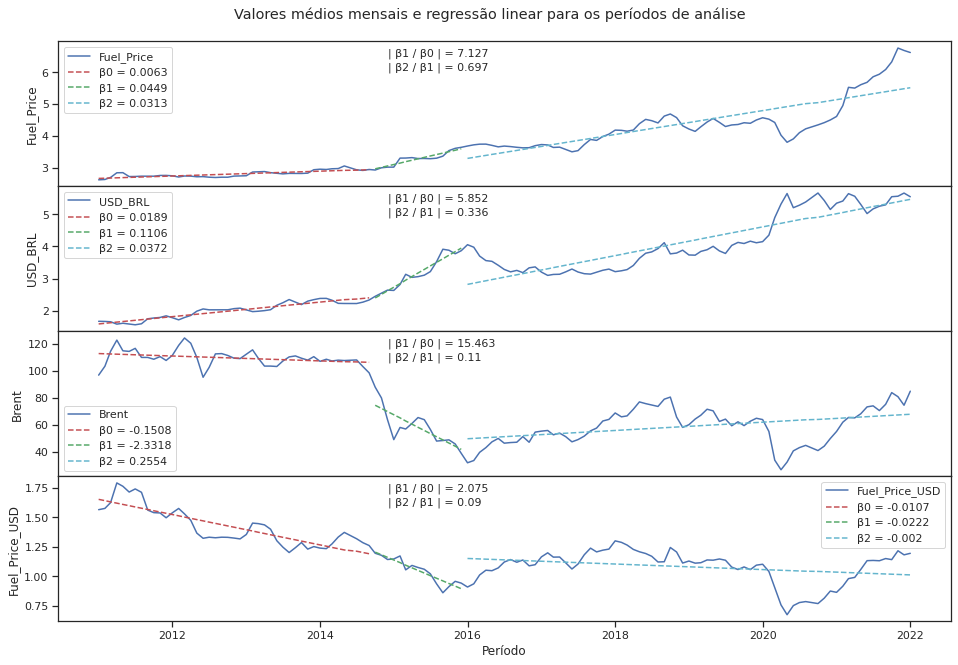

In [ ]:
# PLOTANDO Fuel_Price_USD, USD_BRL, Brent e Fuel_Price_USD - período "d"
plot_per_usd (df_st_new, per_d0, per_d1, per_d2)

### A seguir, a adaptação da função de plotagem de gráficos para a verificação da regressão linear durante os **períodos pré e pós pandêmicos**
### Variáveis:
### **Fuel_Price, USD_BRL, PETR4, Brent, IPCA e MWh**
<hr>

In [ ]:
# Função para plotar os gráficos das regressões lineares 
# nos períodos pré e pós pandêmicos
def plot_per_covid (df_base, per_0, per_1, per_2):

  # Criando a área de plotagem:
  #fig, ax = plt.subplots(6, 1, figsize = (25,16.667), sharex=True)
  fig, ax = plt.subplots(6, 1, figsize = (18,12), sharex=True)
  plt.subplots_adjust(hspace = 0)
  # Letra beta
  beta="\u03B2"
  # Criando as colunas da plotagem:
  cols = ["Fuel_Price", "USD_BRL", "PETR4", "Brent", "IPCA", "MWh"]

  for i in range(len(cols)):
    # Retas Calculadas
    # Calculando parâmetros para o per_0
    [beta0, linha0] = gera_lr (per_0,cols[i])

    if isinstance(per_1, pd.DataFrame):
      # Calculando parâmetros para o per_1
      [beta1, linha1] = gera_lr (per_1,cols[i])
      # Correlação entre betas
      ft_beta1 = abs(round(beta1/beta0, 3))
      
    # Se houver período 2
    if isinstance(per_2, pd.DataFrame):
      # Calculando parâmetros para o per_2
      [beta2, linha2] = gera_lr (per_2,cols[i])
      # Correlação entre betas
      ft_beta2 = abs(round(beta2/beta1, 3))

      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):len(linha0)+len(linha1), ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      ax[i].plot(df_base.iloc[len(linha0)+len(linha1):, ].index, linha2, 'c--', label=f'{beta}2 = {beta2}')
      #ax[i].text(0.37, .90, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      #ax[i].text(0.37, .80, f'| {beta}2 / {beta}1 | = {ft_beta2}', transform=ax[i].transAxes, fontsize=11)
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend()
            
    # Se houver período 1
    elif isinstance(per_1, pd.DataFrame):
      
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].plot(df_base.iloc[len(linha0):, ].index, linha1, 'g--', label=f'{beta}1 = {beta1}')
      #ax[i].text(0, 0, f'{beta}1/{beta}2 = {ft_beta1}', transform=ax[i].get_xaxis_transform())
      #ax[i].text(0.37, .90, f'| {beta}1 / {beta}0 | = {ft_beta1}', transform=ax[i].transAxes, fontsize=11)
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend(loc=0)
    
    # Se houver somente o período 0
    else:
      # Plotando os gráficos
      ax[i].plot(df_base[cols[i]], label=cols[i])
      ax[i].plot(df_base.iloc[:len(linha0), ].index, linha0, 'r--', label=f'{beta}0 = {beta0}')
      ax[i].set_ylabel(cols[i])
      ax[i].set_xlabel('Período')
      ax[i].legend()

  plt.suptitle('Valores médios mensais e regressão linear para períodos COVID', y=.915)
  
  # Salvando o gráfico/a figura gerada:
  # path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
  path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
  fig = plt.gcf()
  #fig.savefig(path_fig+'fig_per_covid', format='jpg')

  plt.show()

### Plotando a regressão linear para o **período COVID** 
### Variáveis: **Fuel_Price, USD_BRL, PETR4, Brent, IPCA e MWh**
<hr>

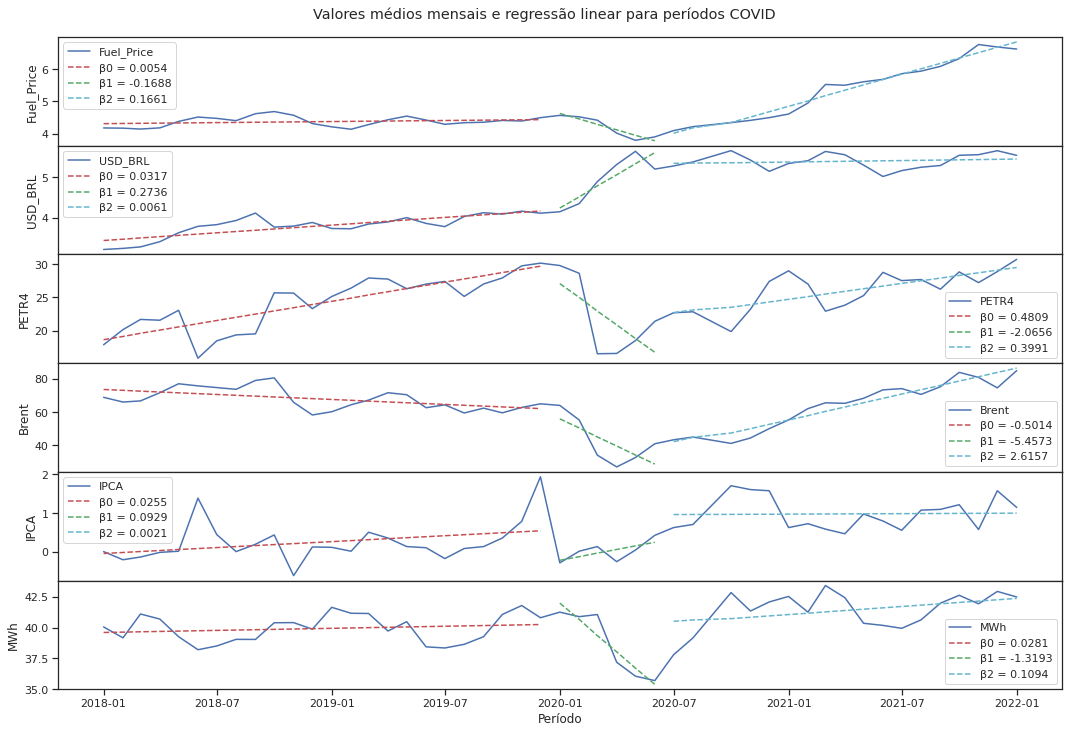

In [ ]:
# Análise do período COVID:
# período para todas as variáveis - período "g" (COVID)
plot_per_covid (df_st_new.loc[df_st_new["Date"]>'2017-12-31'], per_g0, per_g1, per_g2)

In [ ]:
# Separando os valores do IPCA entre 01/01/2018 & 31/12/2019
# e verificando as estatísticas 
ipca_per_f0 = df_st_new[(df_st_new.index>'2017-12-31') & (df_st_new.index <= '2019-12-31')]
stats_ipca_per_f0 = ipca_per_f0.describe().T.reset_index()

# Separando os valores entre 01/01/2020 & 30/06/2020
ipca_per_f1 = df_st_new[(df_st_new.index > '2019-12-31') & (df_st_new.index <= '2020-06-30')]
stats_ipca_per_f1 = ipca_per_f1.describe().T.reset_index()

# Separando os valores após 30/06/2020
ipca_per_f2 = df_st_new[(df_st_new.index>'2020-06-30')]
stats_ipca_per_f2 = ipca_per_f2.describe().T.reset_index()

In [ ]:
# Estatísticas IPCA entre 01/01/2018 & 31/12/2019
stats_ipca_per_f0.query('index == ["IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
4,IPCA,24.0,0.254583,0.522094,-0.61,0.01,0.125,0.38,1.94


In [ ]:
# Estatísticas IPCA entre 01/01/2020 & 30/06/2020
stats_ipca_per_f1.query('index == ["IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
4,IPCA,6.0,0.018333,0.263167,-0.28,-0.1825,0.035,0.1175,0.43


In [ ]:
# Estatísticas IPCA após 30/06/2020
stats_ipca_per_f2.query('index == ["IPCA"]')

,index,count,mean,std,min,25%,50%,75%,max
4,IPCA,18.0,0.983889,0.414575,0.47,0.63,0.89,1.2025,1.71


###**Análise de tendência (continuação)**
### As análises das regressões lineares vão ao encontro do que foi inferido por meio das medidas estatísticas de tendência central/posição
### Embora não haja a ideia de causalidade direta entre as variáveis econômicas e o preço da gasolina, até porque são inúmeras a variáveis e todas atuam em conjunto, os dados apontam para a existência de correlação entre elas
### Maiores detalhes estão disponíveis no texto do TCC
### A seguir, vamos analisar as características das séries temporais com foco em seus aspectos de tendência a sazonalidade
<hr>

# **Seção 4.2**
### **Séries temporais: aspectos de *estacionariedade*, *tendência* e *sazonalidade*** 
<hr WIDTH=30% ALIGN=LEFT NOSHADE>


- **Estacionariedade**: um processo estocástico pode ser considerado estacionário quando mantém suas propriedades estatísticas em equilíbrio, sem alteração ao londo do tempo, oscilando ao redor de uma média e variância constantes.
- **Tendência**: a tendência de uma série indica o seu comportamento "de longo prazo", isto é, se ela cresce ou decresce, assim com a velocidade dessas mudanças.
- **Sazonalidade**: em uma série, a sazonalidade corresponde às oscilações de subida e descida que se repetem em um determinado período (ano, mês, dia, semana etc.). A sazonalidade representa, em geral, variações cíclicas de curto prazo que ocorrem durante o ano, repetindo-se sistematicamente ano após ano.

### Vamos verificar primeiramente se as séries são ou não estacionárias. Uma série temporal estacionária é aquela cuja medição de sua série temporal reflete um sistema em um estado estável.
<hr>

In [ ]:
# Incluindo a coluna com as médias mensais do preço da gasolina
# em dólares (Fuel_Price_USD)
df_st['Fuel_Price_USD'] = df_st_new['Fuel_Price_USD']

In [ ]:
# Renomeando a coluna USD/BRL para poder salvar o gráfico
df_st.rename(columns={"USD/BRL":"USD_BRL"}, inplace=True) 

In [ ]:
# Utilizando teste Dickey-Fuller Aumentado (teste de hipótese)
# Hipótese nula: 
# raiz unitária => processo não estacionário (valor p >= 0.05)
# Hipótese alternativa: 
# raiz não unitária => processo estacionário (valor p < 0.05)
for col in df_st.columns:
    result = adfuller(df_st[col].values)
    print(f'p-value coluna {col} = {result[1]}') 

p-value coluna Fuel_Price = 0.9976536856845004
p-value coluna USD_BRL = 0.935450995954613
p-value coluna PETR4 = 0.7153332017790403
p-value coluna Brent = 0.4269542356617996
p-value coluna IPCA = 3.665930093547486e-07
p-value coluna MWh = 0.573812390051542
p-value coluna Fuel_Price_USD = 0.18089066086327016


###Como pode-se ver, apenas IPCA possui uma série estacionária.
<hr>

### Abaixo, plota-se, como exemplo, o gráfico da primeira diferença para o consumo de energia no país (MWh)
<hr>

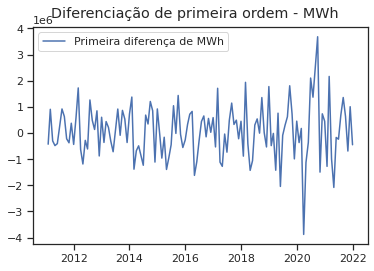

In [ ]:
## Calculando e plotando a primeira diferença de MWh
#diff01 = df_st["MWh_x_1e6"].diff()
diff01 = df_st["MWh"].diff()
plt.plot(diff01, label='Primeira diferença de MWh')
plt.legend()
plt.suptitle('Diferenciação de primeira ordem - MWh', y=.95)

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_diff_01_MWh.jpg', format='jpg')

plt.show()

In [ ]:
# Utilizando teste Dickey-Fuller Aumentado (teste de hipótese) 
# para as diferenças de primeira ordem
# H0: raiz unitária => processo não estacionário (valor p >= 0.05)
# HA: raiz não unitária => processo estacionário (valor p < 0.05)
for col in df_st.columns:
  diff01 = df_st[col].diff()
  result01 = adfuller(diff01[1:].values)
  print(f'p-value: primeira diferença coluna {col} = {result01[1]}')

p-value: primeira diferença coluna Fuel_Price = 3.995403237977325e-10
p-value: primeira diferença coluna USD_BRL = 2.543357424571367e-13
p-value: primeira diferença coluna PETR4 = 1.5218703619251076e-11
p-value: primeira diferença coluna Brent = 5.297688577567617e-13
p-value: primeira diferença coluna IPCA = 3.793127777972014e-09
p-value: primeira diferença coluna MWh = 1.3645153202841915e-13
p-value: primeira diferença coluna Fuel_Price_USD = 4.482347333762229e-12


### Abaixo criam-se os gráficos de decomposição das séries temporais para a avaliação de seus componentes de tendência, sazonalidade e resíduo (usando *seasonal_decompose*)
<hr>

In [ ]:
# Função de decomposição das séries temporais
def st_decomp(name):
    
    # Dataset serie_temporal_fuel_price (df_st)
    # Criando a lista inicial com a coluna de df_st (série temporal)
    data = [df_st[name]]

    # Decomposição da série temporal, criando uma variável para cada formato
    decomposicao = seasonal_decompose(data[0], freq=12, extrapolate_trend=12)
    #decomposicao = seasonal_decompose(data[0], period=11)

    # Análise de tendência
    data.append(decomposicao.trend)

    # Análise de sazonalidade
    data.append(decomposicao.seasonal)

    # Extraindo a aleatoriedade dos dados
    data.append(decomposicao.resid)

    # Visualizando os resultados
    fig, ax = plt.subplots(4,1, figsize = (13,8.66667), sharex=True)
    plt.subplots_adjust(hspace = 0)
    plt.suptitle('Série temporal e decomposição', fontdict = {'fontsize':15, 'fontweight':'bold', 'color':'black'}, y=.925 )

    components = [name] + ['Tendência', 'Sazonalidade', 'Aleatoriedade']
    
    # Plotagem final dos gráficos
    for i in range(len(components)):
        ax[i].plot(data[i], label = components[i])
        ax[i].legend(loc=2)

    # Salvando o gráfico/a figura gerada:
    # path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
    path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
    fig = plt.gcf()
    #fig.savefig(path_fig+'fig_decomp_'+name, format='jpg')

    plt.show()

### **Fuel_price:** decomposição em tendência, sazonalidade e resíduo
<hr>

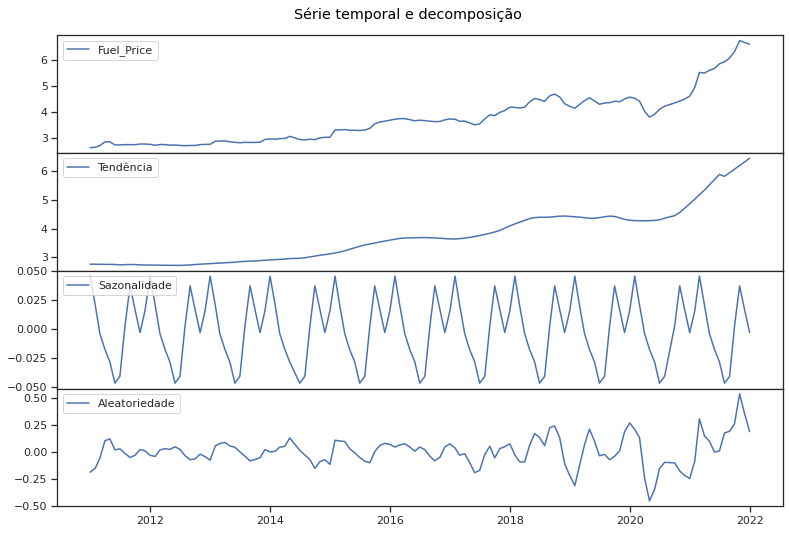

In [ ]:
st_decomp('Fuel_Price')

###Observa-se que o preço da gasolina no revendedor mostra uma tendência contínua de crescimento, com aceleração mais acentuada após o final de 2015 e início de 2016. A sazonalidade aponta para o aumento nos preços no final e baixa na metade de cada ano. O componente de resíduo apresenta maiores variações a partir de 2019.
<hr>

### **USD_BRL:** decomposição em tendência, sazonalidade e resíduo
<hr>

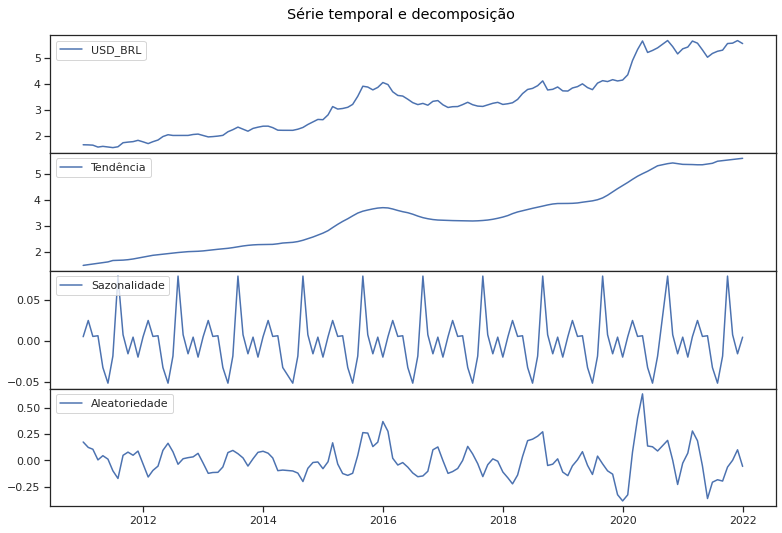

In [ ]:
st_decomp('USD_BRL')

###A decomposição da curva com a cotação do dólar também mostra uma tendência contínua de crescimento, com aceleração no início de 2015. A sazonalidade aponta para uma grande variação nos valores em meados de cada ano. Há mais de uma alta por ciclo. O componente de resíduo mostra um grande pico no início de 2020, ou seja, no começo da pandemia de corona vírus
<hr>

### **PETR4:** decomposição em tendência, sazonalidade e resíduo
<hr>

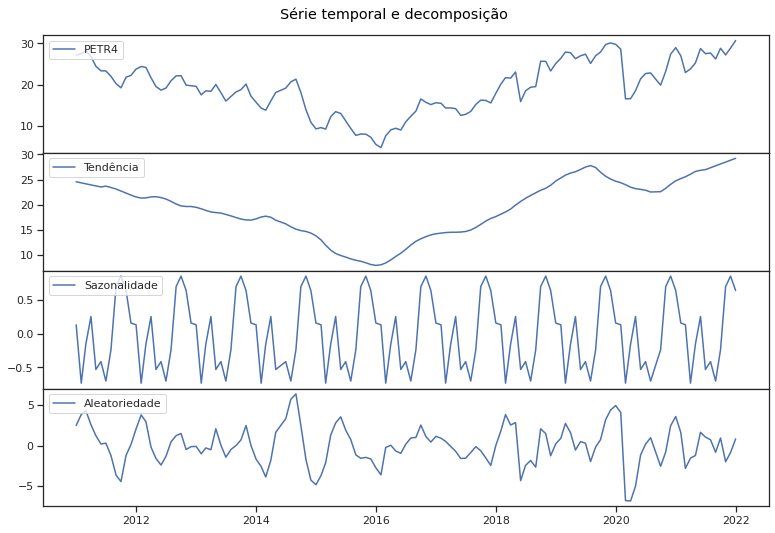

In [ ]:
st_decomp('PETR4')

### Quanto ao preço das ações da Petrobras, inicialmente há uma tendência de queda, com pico negativo em 2016, e uma consistente tendência positiva desde então. Quanto à sazonalidade, os valores de pico positivo ocorrem antes do final do ano, passando para baixa entre dezembro e janeiro, mas com oscilação bastante significativa. Ha mais de um pico no ciclo. A componente de aleatoriedade apresenta variações um pouco mais bruscas em 2011; no início de 2015; e também no começo de 2020
<hr>

### **BRENT:** decomposição em tendência, sazonalidade e resíduo
<hr>

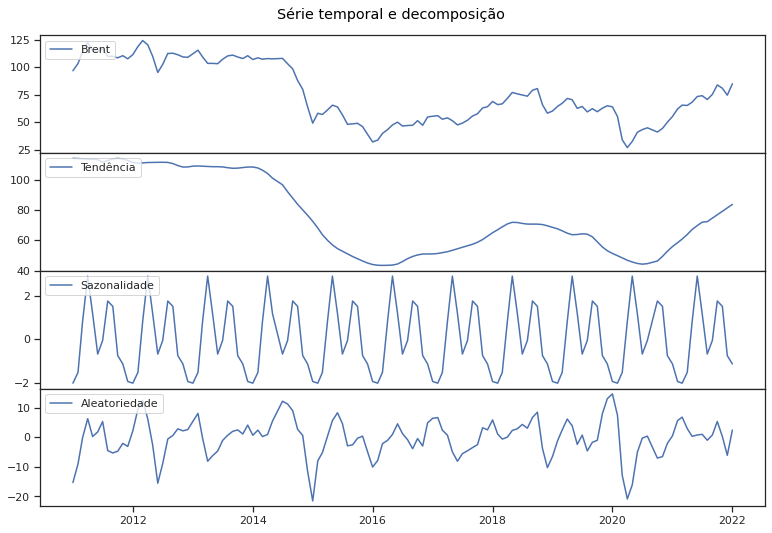

In [ ]:
st_decomp('Brent')

### A componente de tendência da curva da cotação do barril Brent, que vinha em alta estável, mostra importante queda ao longo de 2015 e início de 2016; leve subida entre meados de 2016 e meados de 2019; queda até o começo de 2020; e alta mais vigorosa a partir de então. Em termos de sazonalidade, vê-se que o ciclo é bastante variado, aparecendo aqui também mais de um pico anual. A componente residual indica variações mais aparentes no ano de 2012; bem como no início dos anos de 2015 e 2020
<hr>

### **IPCA:** decomposição em tendência, sazonalidade e resíduo
<hr>

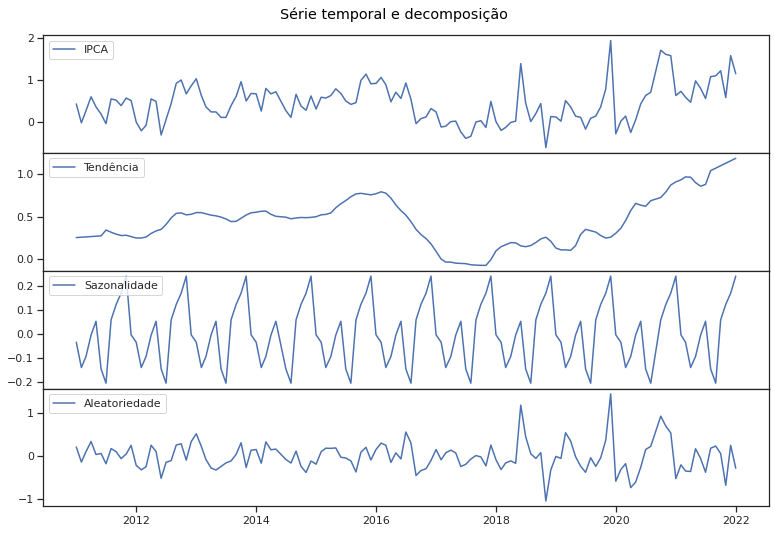

In [ ]:
st_decomp('IPCA')

###A curva do IPCA é muito oscilante, o que se reflete na componente de tendência. A componente sazonal mostra grande variação de valores, com maior alta aparente no segundo semestre do ano. O componente de aleatoriedade manifesta variações mais amplas a partir de 2018
<hr>

### **Consumo de energia (MWh):** decomposição em tendência, sazonalidade e resíduo
<hr>

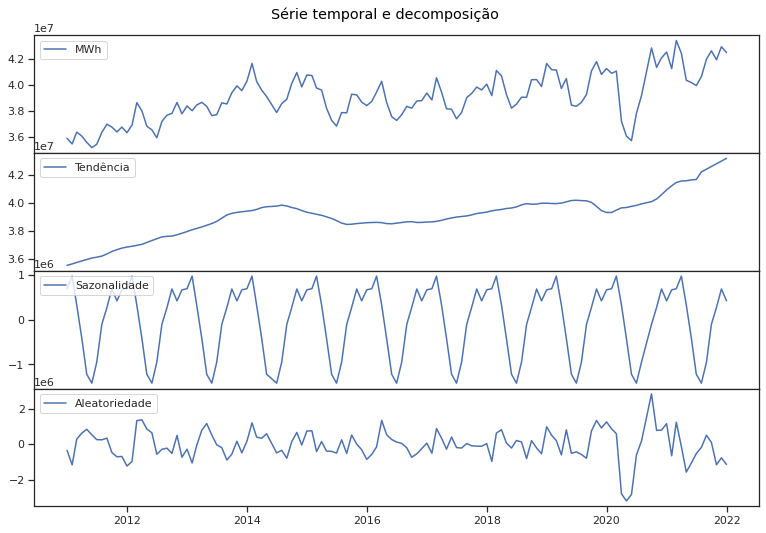

In [ ]:
st_decomp('MWh')

###A série histórica do consumo de energia no país exibe tendência de alta por todo o período de análise. A sazonalidade revela o menor consumo para os meses do inverno brasileiro, especialmente junho e julho, com aumento no verão. Já a curva de resíduos deixa claro a disrupção no início de 2020

### **Fuel_Price_USD:** decomposição em tendência, sazonalidade e resíduo
<hr>

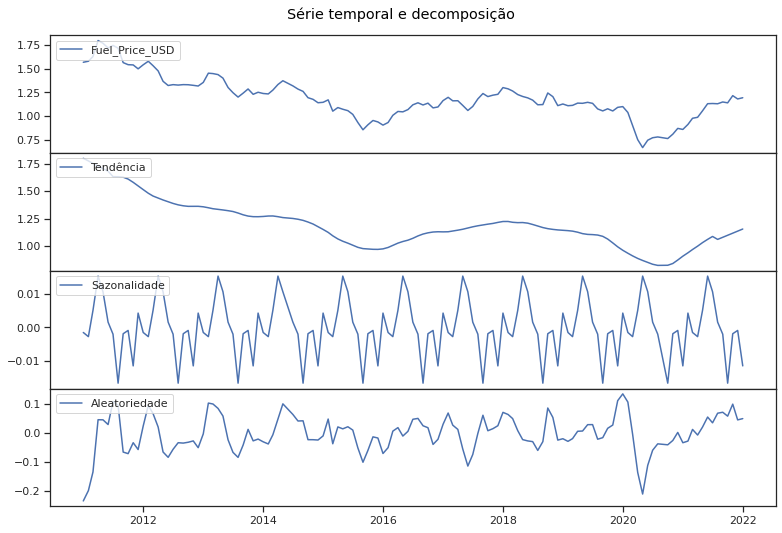

In [ ]:
st_decomp('Fuel_Price_USD')

###O preço da gasolina em dólares apresenta uma tendência inicial de queda até 2016; um leve aumento e quase estabilidade de 2016 a 2019; nova queda até o primeiro terço de 2020; e viés de subida desde então. A componente de sazonalidade é bastante conturbada, com significativa variação entre altos e baixos, com pico aparente ao final do segundo trimestre. Novamente a componente de aleatoriedade ressalta a ruptura ocorrida na entrada de 2020

# **Seção 4.3**
### **Séries temporais: correlação entre as variáveis econômicas** 
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

###Novamente se recorre ao uso de regressão linear, bem como à matriz de correlação, com o objetivo de avaliar como cada variável se comporta em relação ao preço do litro da gasolina
<hr>

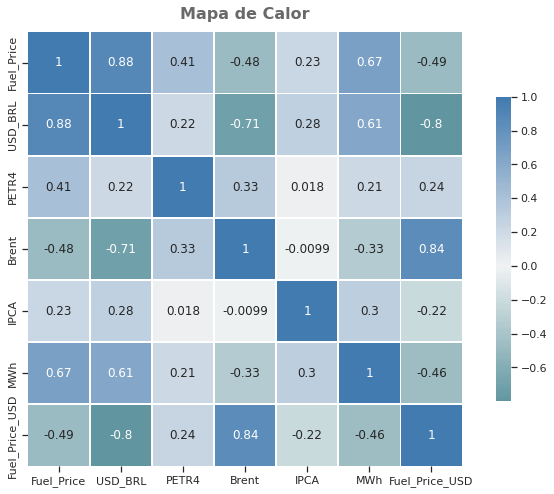

In [ ]:
# Extraindo a correlação entre as variáveis
corr = df_st.corr()

# Visualização da correlação em um heatmap
# Parâmetros de plotagem do gráfico
cmap = sns.diverging_palette(210, 245, as_cmap=True)

# Construindo o gráfico
f, ax = plt.subplots(figsize=(12,8))
ax.set_title('Mapa de Calor', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'dimgray'}, y=1.015)
#fig = plt.figure(figsize= (12,12))
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .7}, linecolor='white', annot = True)
#plt.suptitle('Mapa de Calor: Matriz de Correlação', fontdict = {'fontsize':15, 'fontweight':'bold', 'color':'k'}, x=.45, y=.850)

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_heatmap', format='jpg')

plt.show()

### Pelo mapa de calor verifica-se a alta correlação entre o preço da gasolina e a cotação do dólar frente ao real. Há forte correlação com o consumo de energia e uma correlação mais fraca, mas positiva, com o valor das ações da Petrobras e o IPCA. A correlação entre o preço da gasolina no revendedor e a cotação internacional do barril de petróleo negativa. Interessante notar que o preço da gasolina em dólares possui também possui uma correlação negativa com preço da gasolina em reais; e a correlação entre o preço da gasolina em dólares e a cotação do barril Brent é elevada e positiva.
<hr>

### Outra forma rápida para verificar as relações entre as variáveis em questão seria utilizar a função de plotagem *pairplot()*. Ainda, esta função faz uso do parâmetro *kind="reg"* para traçar a reta de regressão linear entre as variáveis
### Usando *Fuel_Price* como no *eixo y* e as demais variáveis como *eixo x*, temos os gráficos a seguir
<hr>

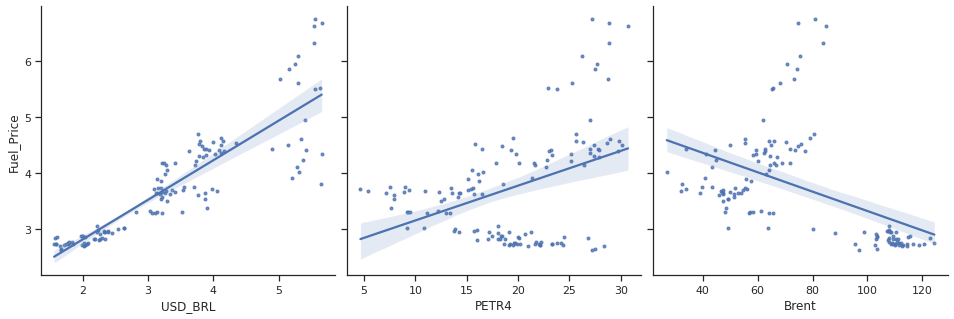

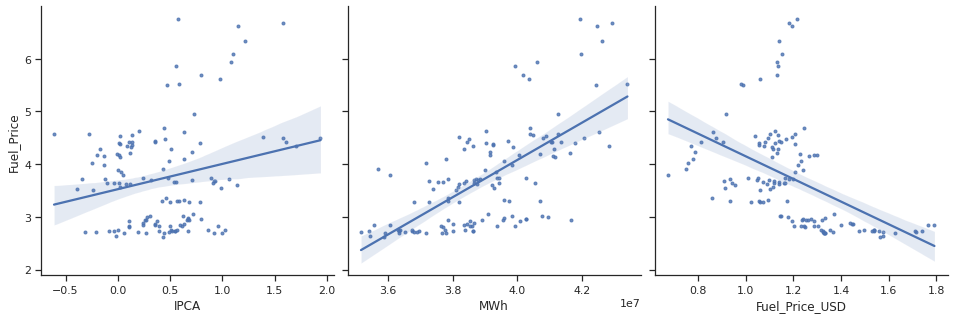

In [ ]:
# Visualização gráfica da regressão linear
sns.pairplot(df_st, 
             x_vars=['USD_BRL', 'PETR4', 'Brent'], # 'IPCA', 'MWh', 'Fuel_Price_USD'],
             y_vars=['Fuel_Price'],
             markers='.',
             height=4.5, 
             aspect=1, 
             kind="reg")

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_pairplot_01', format='jpg')

plt.show()

# Visualização gráfica da regressão linear
sns.pairplot(df_st, 
             x_vars=['IPCA', 'MWh', 'Fuel_Price_USD'],
             y_vars=['Fuel_Price'],
             markers='.',
             height=4.5, 
             aspect=1, 
             kind="reg")

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_pairplot_02', format='jpg')

plt.show()

###Novamente os gráficos gerados confirmam a alta correlação positiva entre Fuel_Price, USD_BRL e MWh; a correlação positiva, mas mais fraca, entre Fuel_Price, PETR4 e IPCA; e a correlação negativa entre Fuel_Price, Brent ou Fuel_Price_USD. 
<hr>

### É interessante também verificarmos a relação que há entre as colunas com as variações percentuais de cada variável econômica e a variação percentual do preço da gasolina
### Novamente recorre-se à função *pairplot()*, sendo os gráficos gerados os seguintes
<hr>

In [ ]:
# Renomeando a coluna var_USD/BRL para poder salvar a figura/o gráfico
df_var_st.rename(columns={"var_USD/BRL":"var_USD_BRL"}, inplace=True) 

In [ ]:
# Criando a coluna adequada de df_var_st
st_tmp = df_st['Fuel_Price_USD'].reset_index()
df_var_st['var_Fuel_Price_USD'] = st_tmp['Fuel_Price_USD']
df_var_st['var_Fuel_Price_USD'] = df_var_st['var_Fuel_Price_USD'].pct_change(periods=1)

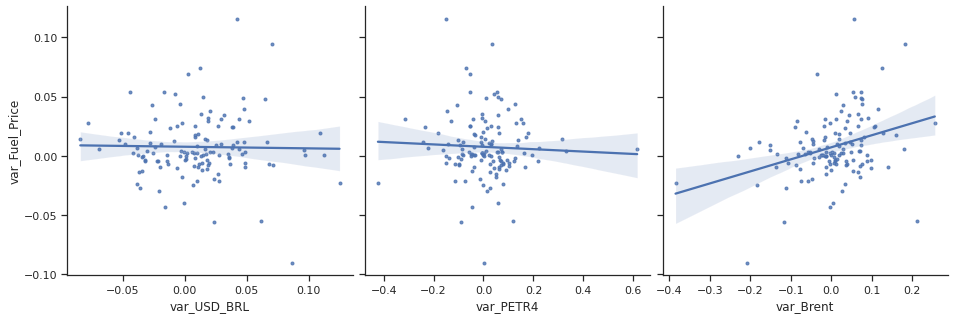

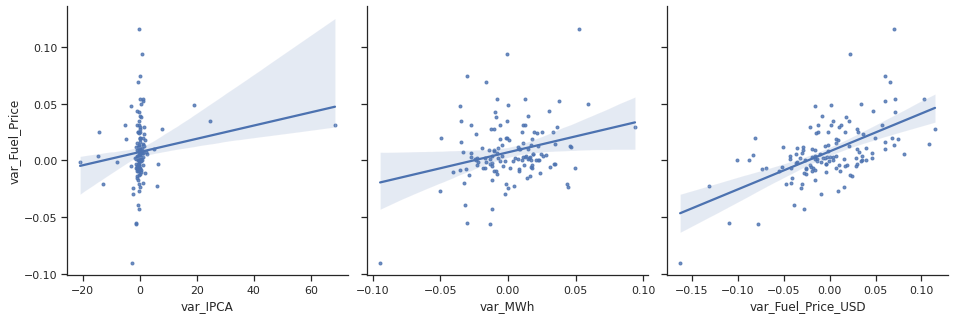

In [ ]:
# O mesmo plot anterior, porém, apenas com as variações percentuais
sns.pairplot(df_var_st.drop(columns=['Date']), 
             x_vars=['var_USD_BRL', 'var_PETR4', 'var_Brent'], #, 'var_IPCA', 'var_MWh', 'var_Fuel_Price_USD'], 
             y_vars=['var_Fuel_Price'],
             markers='.',
             height=4.5, 
             aspect=1,
             kind="reg")

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_pairplot_var_01', format='jpg')

plt.show()

# O mesmo plot anterior, porém, apenas com as variações percentuais
sns.pairplot(df_var_st.drop(columns=['Date']), 
             x_vars=['var_IPCA', 'var_MWh', 'var_Fuel_Price_USD'], 
             y_vars=['var_Fuel_Price'],
             markers='.',
             height=4.5, 
             aspect=1,
             kind="reg")

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_pairplot_var_02', format='jpg')

plt.show()



### As plotagens das variações percentuais, diferente dos gráficos de dispersão anteriores, indicam que a correlação, nesse caso, é menos explícita. Entretanto, observa-se que as variações percentuais do valor *Brent* e de *Fuel_Price_USD* possuem correlação positiva com as variações percentuais de *Fuel_Price*
<hr>

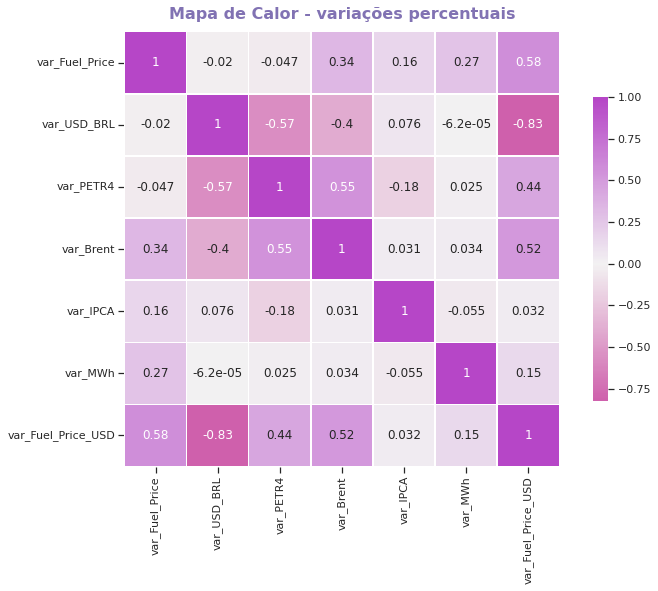

In [ ]:
# Extraindo a correlação entre as variáveis
corr_var = df_var_st.corr()

# Visualização da correlação em um heatmap
# Parâmetros de plotagem do gráfico
cmap = sns.diverging_palette(330, 300, as_cmap=True)

# Construindo o gráfico
f, ax = plt.subplots(figsize=(12,8))
ax.set_title('Mapa de Calor - variações percentuais', fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'m'}, y=1.015)
#fig = plt.figure(figsize= (12,12))
sns.heatmap(corr_var, cmap=cmap, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .7}, linecolor='white', annot = True)
#plt.suptitle('Mapa de Calor: Matriz de Correlação', fontdict = {'fontsize':15, 'fontweight':'bold', 'color':'k'}, x=.45, y=.850)

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'fig_heatmap_var', format='jpg')

plt.show()

# **Seção 4.4**
### **Análise de cruzamento de médias móveis** 
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

### Essa análise é muito utilizada por analistas do mercado financeiro, que realizam operações de compra e venda de ações diariamente. E ela pode ser muit útil por evidenciar tendências de preço das ações ao longo do tempo. Quando as médias móveis de curto e longo prazo se encontram e a média de curto prazo passa acima da média de longo prazo, há um tendência de subida do preço do ativo, caso seja o contrário, indica queda.

### Logo, essa análise pode ser aqui utilizada para verificarmos se há uma correspondência no comportamento das variáveis estudadas com a análise de séries temporais.

In [ ]:
# Criando o dataset com as médias móveis

date = [d for d in df_st.index] # Extraindo a coluna de datas para o index dos
                                # dataframe de plotagem das médias móveis

data_dict = {} # Inicialização do dataset de plotagem

cols = df_st.columns.tolist() # Colunas

for col in cols:
    Mc = df_st[col].rolling(2).mean() # Mc média de curto prazo: 2 meses
    Ml = df_st[col].rolling(8).mean() # Ml média de longo prazo: 8 meses
    # Criando o dataset de plotagem 
    # Dicionários: 
    # CHAVE = nome das colunas de df_st
    # CONTEÚDO: dataframe cujo index são as datas, primeira coluna é Mc, segunda coluna é Ml
    data_dict[col] = pd.DataFrame(np.c_[date, Mc, Ml]).set_index(0) 

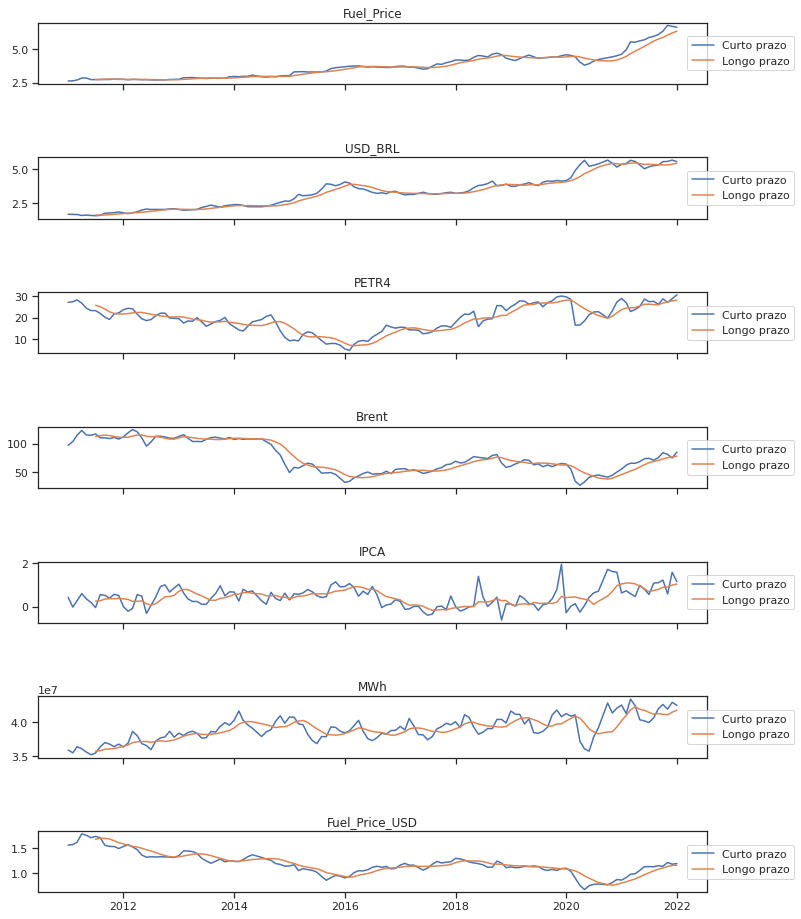

In [ ]:
# Visualização gráfica das médias móveis
fig, ax = plt.subplots(7,1, figsize = (12,16), sharex=True)
plt.subplots_adjust(hspace = 1.2)

for i in range(len(cols)): # Para cada CHAVE do dicionário
    # Plotagem das médias móveis
    ax[i].plot(data_dict[cols[i]]) # CONTEÚDO: Mc e Ml
    ax[i].set_title(cols[i]) # Título é a própria chave (colunas de df_st)
    ax[i].legend(['Curto prazo','Longo prazo'], loc = 'center',bbox_to_anchor=(1.05, .5)) #legendas

# Salvando o gráfico/a figura gerada:
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'
fig = plt.gcf()
#fig.savefig(path_fig+'medias_moveis', format='jpg')

plt.show()

### Interessante notar que o crossover de MC com ML dita a tendência de ML para as grandezas Fuel_Price, USD_BRL, PETR4, Brent e Fuel_Price_USD. Apenas em IPCA e MWh este comportamento é menos evidente
<hr>

### Finaliza-se aqui a exploração dos dados. Inicia-se a modelagem dos dados por meio dos notebooks ***modela_dados_ARIMA_VAR.ipynb*** e ***modela_dados_LSTM.ipynb***
<hr WIDTH=30% ALIGN=LEFT NOSHADE>
